In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from lcls_beamline_toolbox.xraybeamline2d import beam1d as beam, optics1d as optics, beamline1d as beamline

In [2]:
N = 4096
FOV = 10e-3
dx = FOV/N

E0 = 9500

beam_params = {
    'photonEnergy': E0-1,
    'N': N,
    'sigma_x': 15e-6,
    'sigma_y': 15e-6,
    'z0x': 110,
    'z0y': 110,
    'rangeFactor': 5,
    'scaleFactor': 20,
    'z_source': 630
}

In [34]:
b1 = beam.Beam(beam_params=beam_params)

mr1l0 = optics.FlatMirror('mr1l0', length=1, alpha=2.1e-3, z=740,delta=0e-9)
mr2l0 = optics.FlatMirror('mr2l0', length=1, alpha=2.1e-3, z=747.286, orientation=2)

alphaAsym = 5*np.pi/180

# slit = optics.Slit('slit', z=989.9, x_width=20e-6, y_width=500e-6)
entrance_slit = optics.Slit('entrance', z=989, x_width=.5e-3, y_width=.5e-3)

crystal1 = optics.Crystal('c1', hkl=[2,2,0], length=1e-2, width=10e-3, z=990, E0=E0,
                          alphaAsym=0, orientation=2,pol='p')

# should be orientation 0
crystal2 = optics.Crystal('c2', hkl=[2,2,0], length=1e-2, width=10e-3, z=990.012, E0=E0,alphaAsym=alphaAsym, 
                          orientation=0,pol='p')
crystal3 = optics.Crystal('c3', hkl=[2,2,0], length=1e-2, width=10e-3, z=990.112, E0=E0,alphaAsym=0, orientation=0,
                         asym_type='emergence',pol='p')
# should be orientation 0
crystal4 = optics.Crystal('c4', hkl=[2,2,0], length=1e-2, width=10e-3, z=990.124, E0=E0,alphaAsym=alphaAsym, 
                          asym_type='emergence', orientation=2,pol='p')
# crystal5 = optics.Crystal('c1', hkl=[2,2,0], length=1.5e-2, z=792, E0=9500,alphaAsym=0*np.pi/180, 
#                           orientation=0)

# print('b: %.2f' % crystal2.b)

crl1 = optics.CRL('crlx', z=990.15, roc=7e-6)
crl2 = optics.CRL('crly', z=990.15,orientation=1, roc=7e-6)
slit = optics.Slit('slit', z=990.2, x_width=100e-6, y_width=100e-6)

# print(crystal.alpha*180/np.pi)
# print(crystal.beta0*180/np.pi)
print((np.sin(crystal2.beta0)/np.sin(crystal2.alpha)))
print(crystal4.alpha*180/np.pi)
# print(crystal5.alpha*180/np.pi)
print(crystal4.beta0*180/np.pi)

# Stack of 20 CRLs for tight focus
# crl_list = []
# for i in range(20):
#     crl_list.append(optics.CRL('crl%d' % i, z=800+i*1e-3,dx=0e-6, ))

IP = optics.PPM('IP', FOV=20e-6, z=991.08, N=256)
upstream_YAG = optics.PPM('YAG1',FOV=1e-3,z=entrance_slit.z + .05, N=256)

# YAG_mid = optics.PPM('YAG_mid',FOV=30e-3,z=990.2, N=256)

downstream_YAG = optics.PPM('YAG2',FOV=1e-3,z=crystal4.z + 4, N=256)
# downstream_YAG = optics.PPM('YAG', FOV=3e-3, z=803, N=256)

# devices = [mr1l0,mr2l0,upstream_YAG]
devices = [mr1l0,mr2l0,entrance_slit,upstream_YAG, downstream_YAG, IP,crystal1,crystal2,crystal3,crystal4, slit,crl1,crl2]
# devices = devices + crl_list

XPP = beamline.Beamline(devices)

k_ix = -np.sin(crystal1.alpha)
k_iy = np.sin(0)
# k_iz = np.sqrt(1 - k_ix ** 2 - k_iy ** 2)
k_iz = np.cos(crystal1.alpha)
k_i = np.array([k_ix,k_iy,k_iz])

print(crystal2.rotation_crystal(k_i, b1.lambda0))
print(crystal1.crystal.get_Darwin_width(14410))

FWHM in x: 359.9449659150756 microns
FWHM in y: 359.9449659150756 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415712075804543
5.415712075804543
b 1.00
b 1.64
b 1.00
b 1.64
0.6102211874545929
24.86894226347203
14.869889912414962
after mr1l0: 0.00
after mr2l0: 0.00
after c1: -0.69
after c2: 0.00
after c3: 0.69
after c4: 0.00
(array([-0.23243732,  0.        ,  0.03319636]), array([0.02418758, 0.        , 0.99970744]))
1.3620401788281523e-05


In [35]:
print(crystal2.alpha)

0.43404492398595806


In [36]:
print(mr1l0.global_x)
print(mr1l0.global_alpha)
print(mr2l0.global_x)
print(mr2l0.global_alpha)
print(crystal1.global_x)
print(crystal1.global_alpha)
print(crystal2.global_x)
print(crystal2.global_alpha)
print(crystal3.global_x)
print(crystal3.global_alpha)
print(crystal4.global_x)
print(crystal4.global_alpha)

0
0.0021
0.030601379936325394
0.0021
0.030601379936325394
-0.346781770654042
0.020625242862907543
-0.2595186173221258
0.02062623496876823
0.3467916917126485
0.03060257337802781
0.2595285383807323


mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: -0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: -0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.07
zy: 360.02
azimuth 0.02 mrad
drift6
delta z: 3.13
zx: 134.17
zy: 360.12
azimuth 0.02 mrad
c3
zx: 134.17
zy: 360.12
azimuth 693.56 mrad
drift7
delta z: -0.31
zx: 134.19
zy: 360.13
azimuth 693.56 mrad
c4
zx: 49.97
zy: 360.13
azimuth 0.01 mrad
drift8
delta z: -3.00
x stays unfocused
y becomes focused
x stays unfocused
y remains focused
zx: 49.99
zy: 360.16
azimuth 0.01 mrad
crlx
y becomes unfocused
focal length: 0.93
zx: -0.94
zy: 360.16

<IPython.core.display.Javascript object>


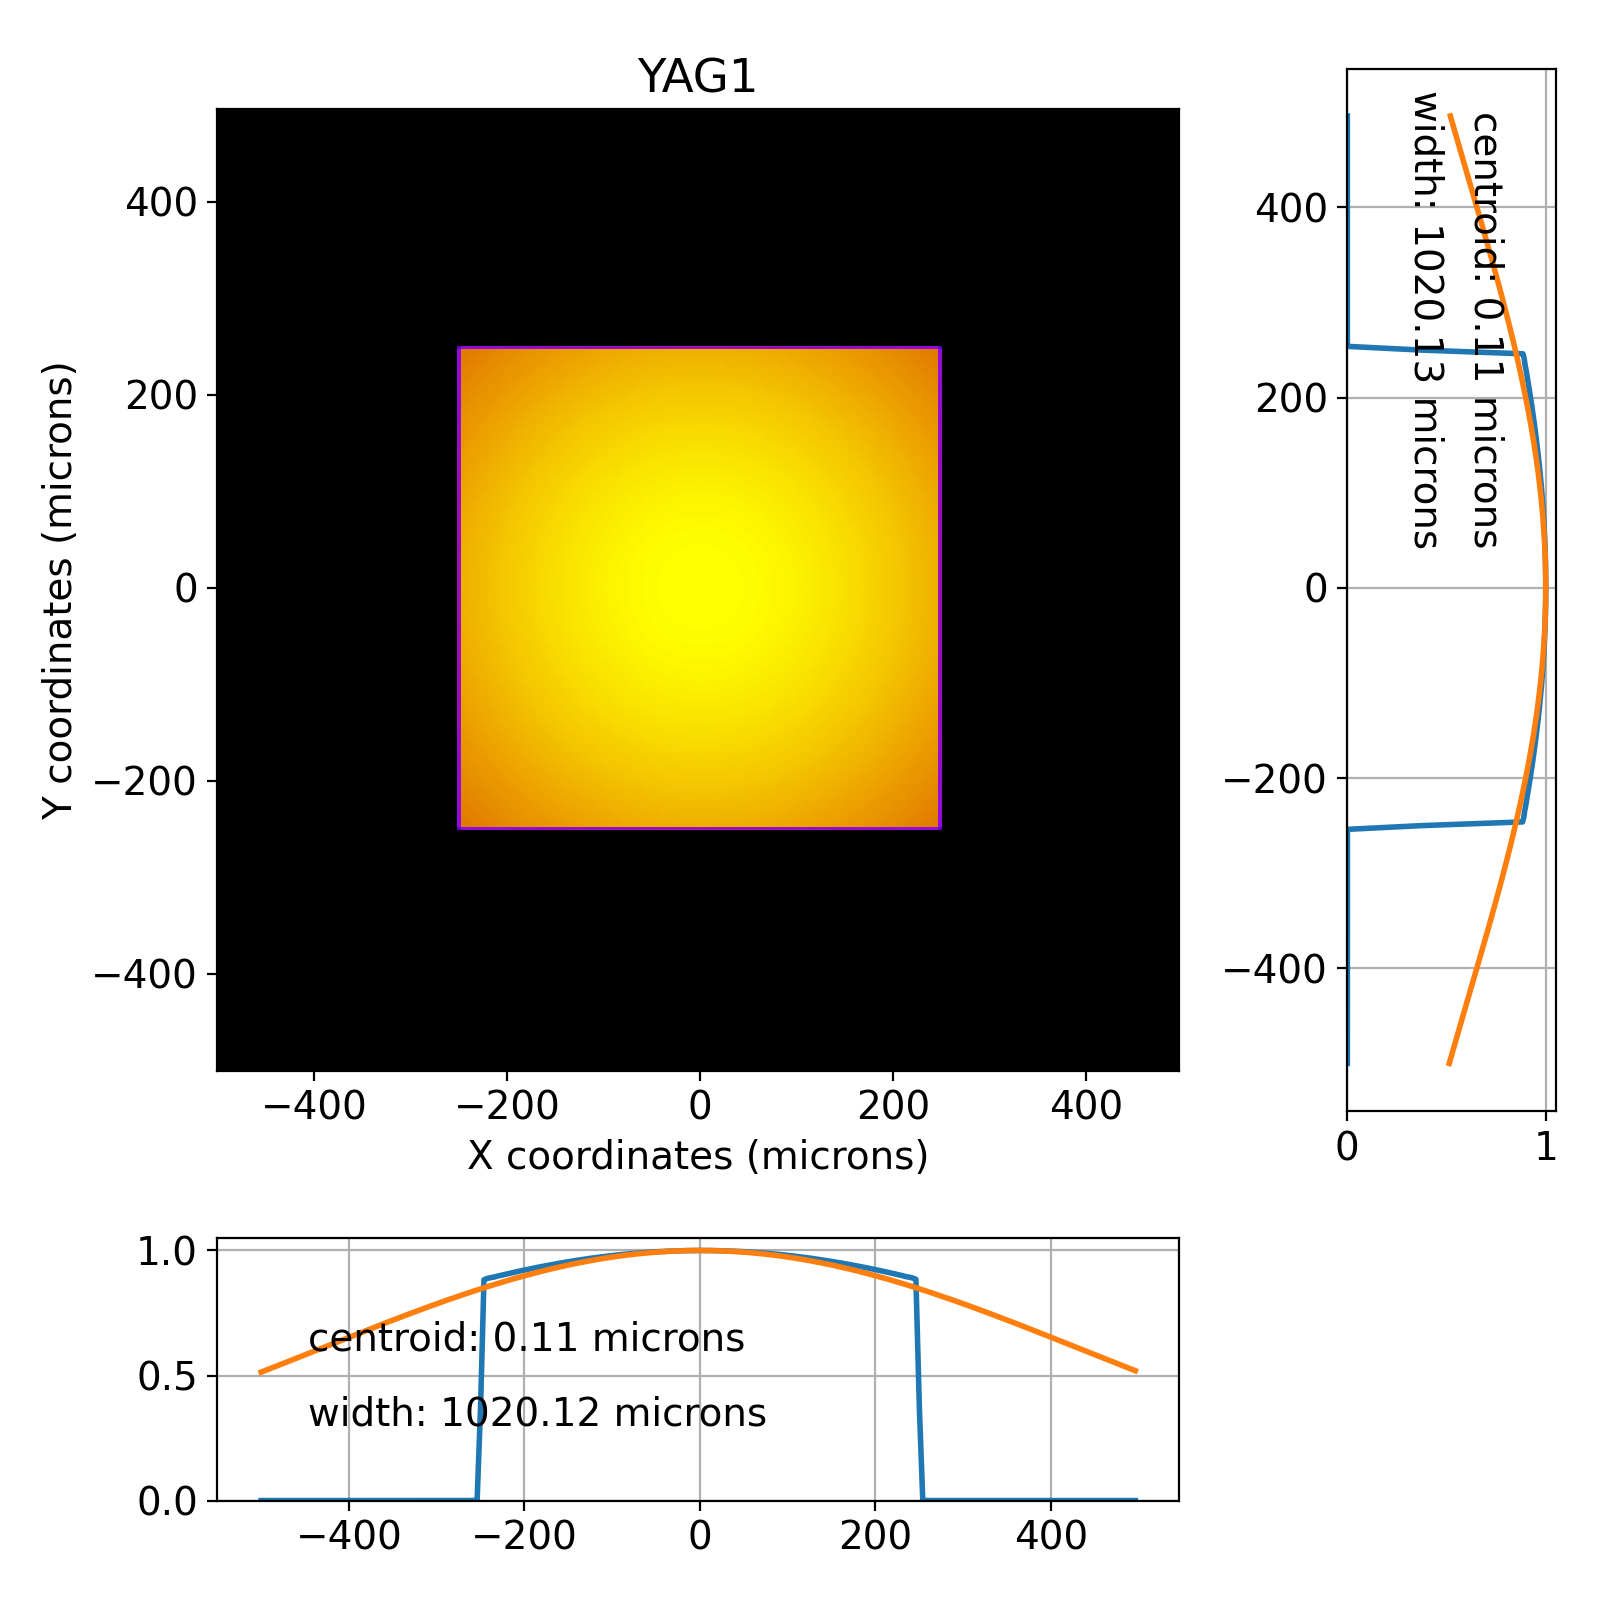

<IPython.core.display.Javascript object>


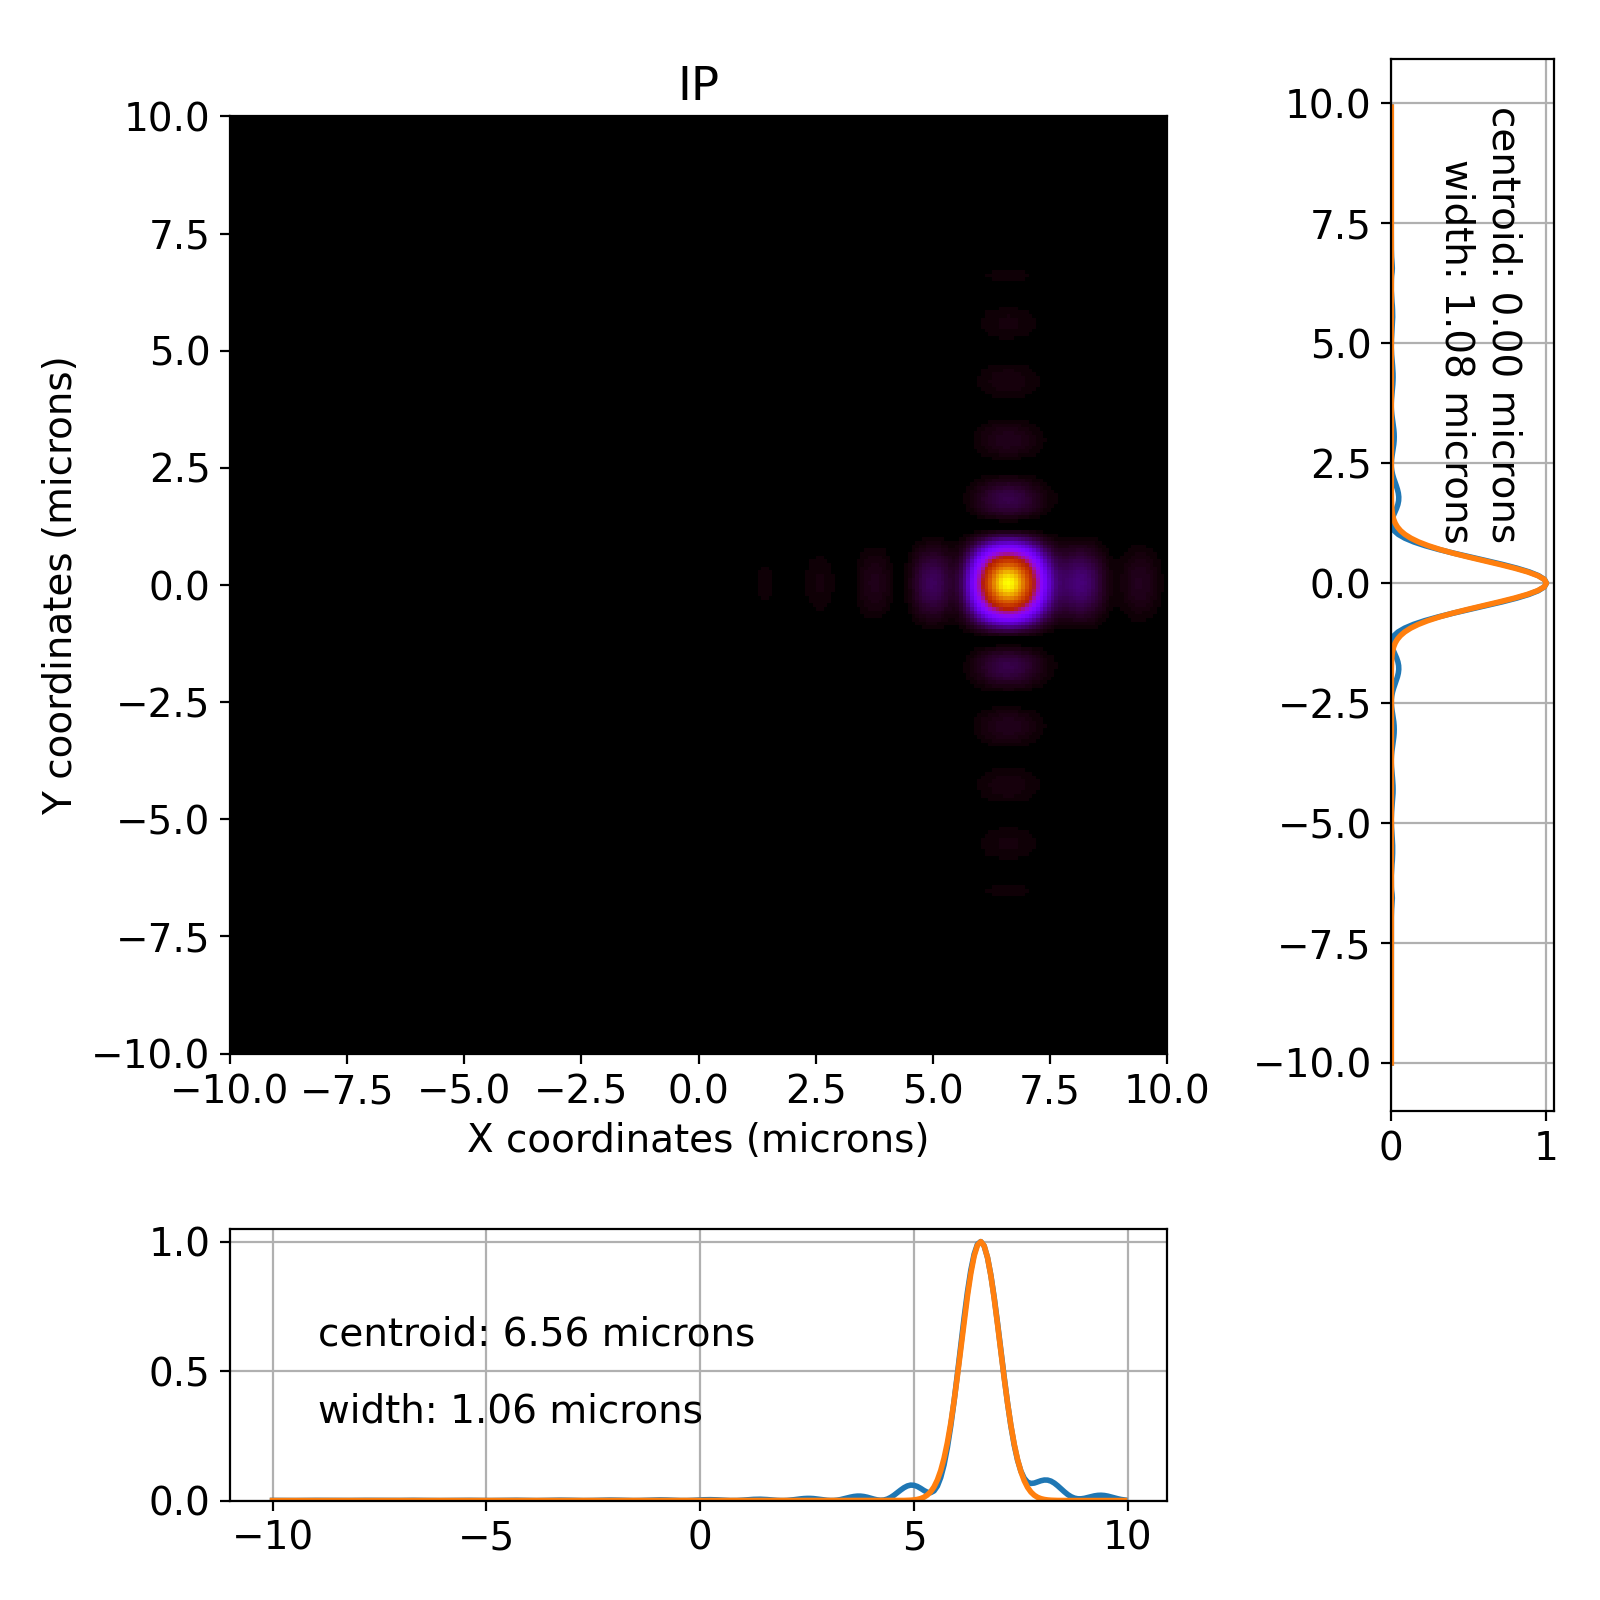

<IPython.core.display.Javascript object>


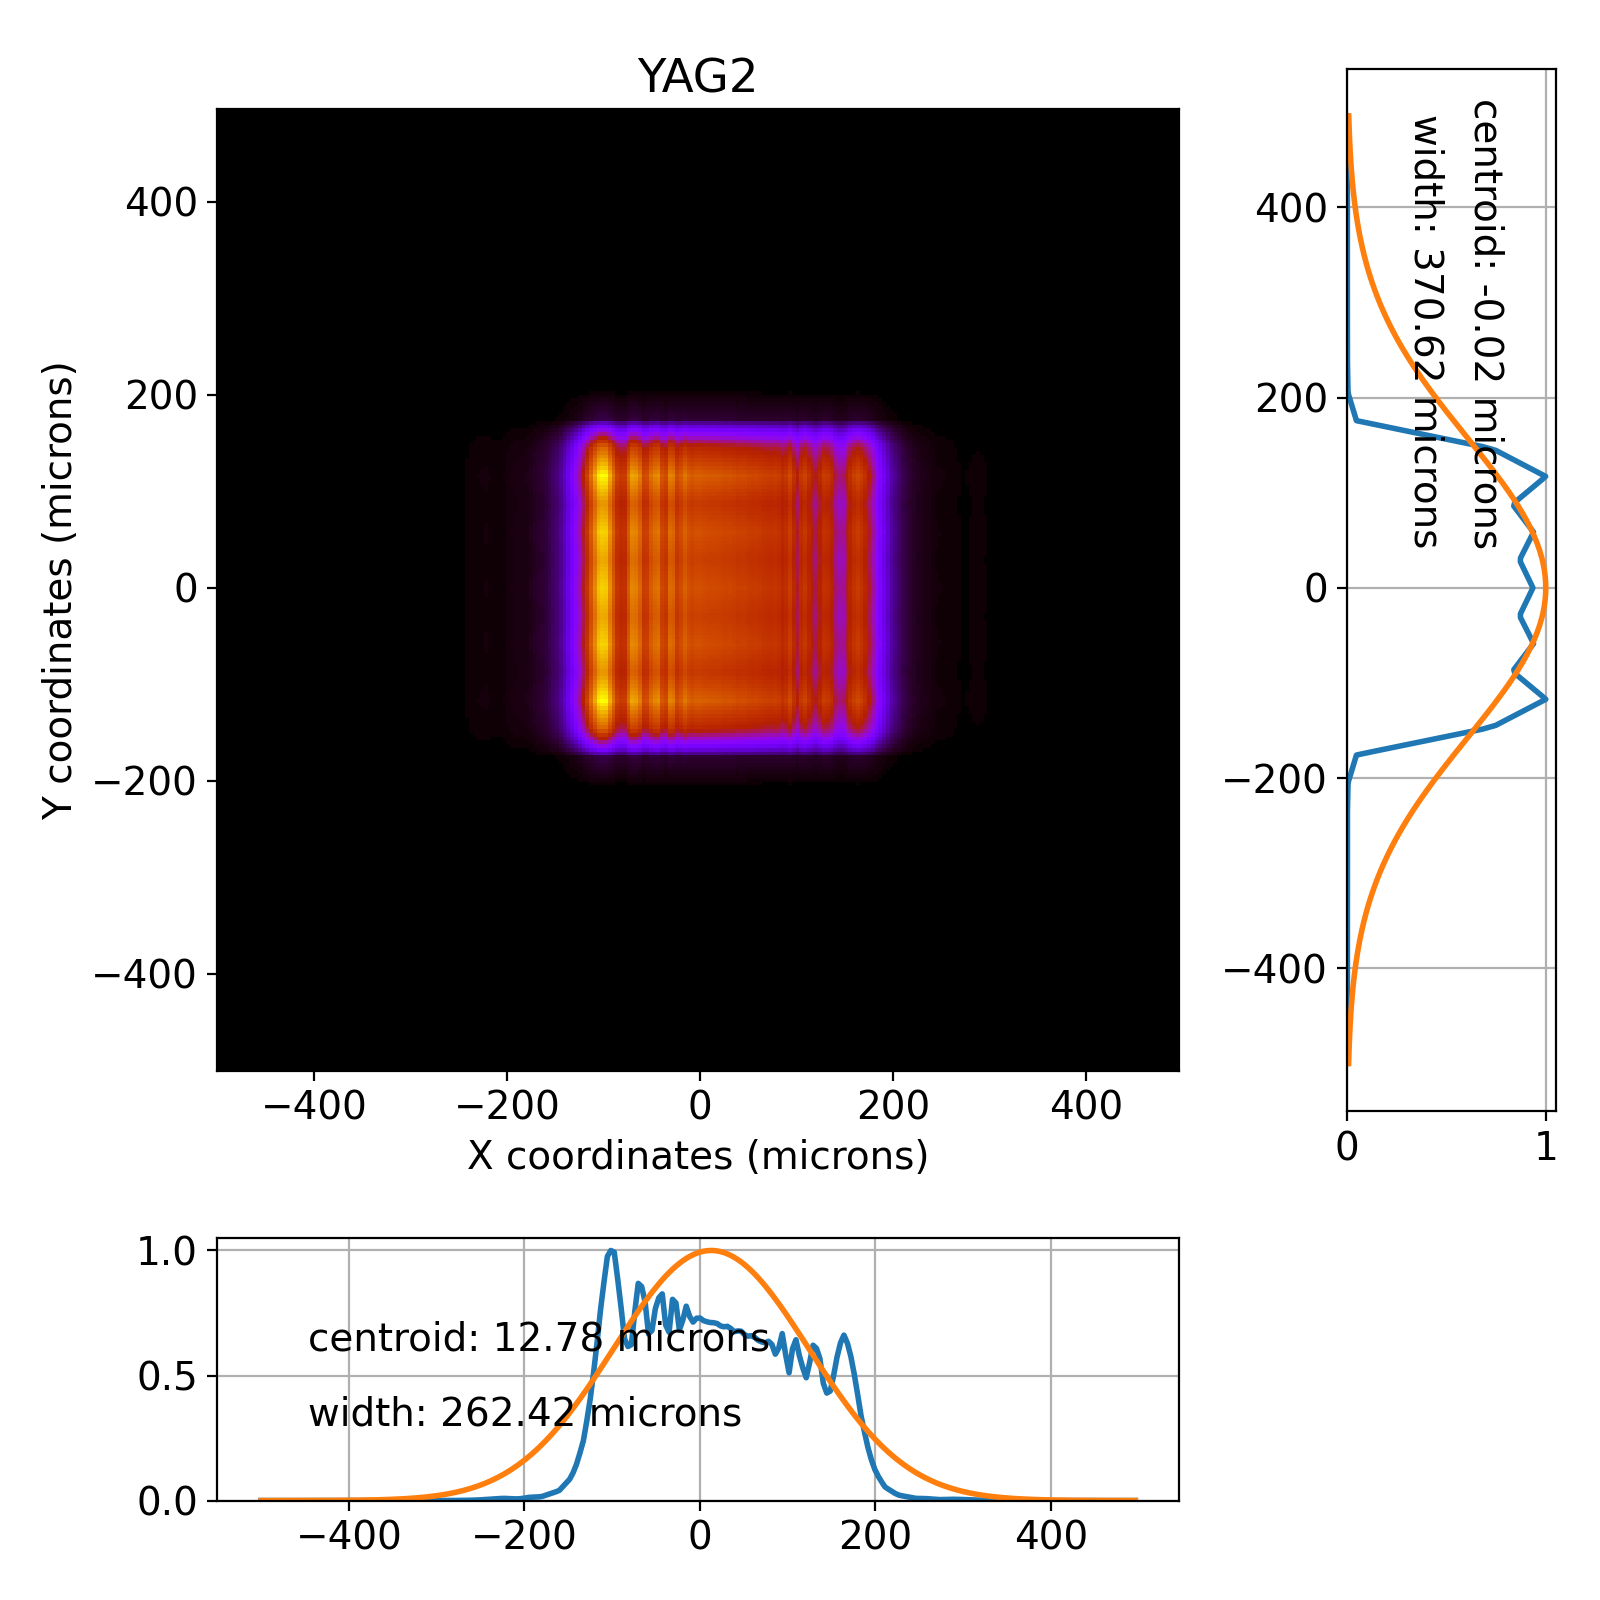

<IPython.core.display.Javascript object>


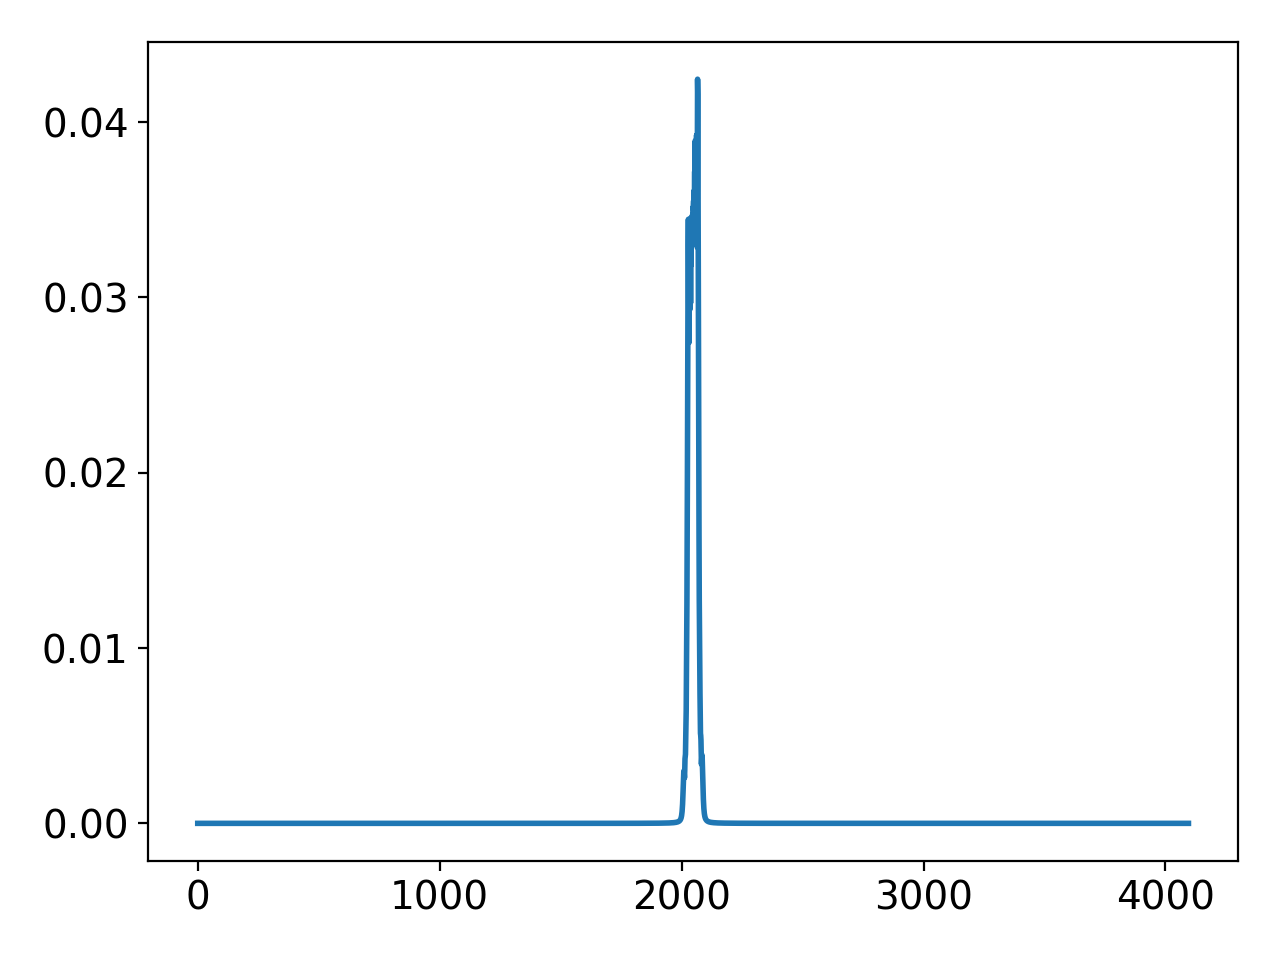

In [37]:
b2 = XPP.propagate_beamline(b1)
XPP.YAG1.view_beam()
XPP.IP.view_beam()
XPP.YAG2.view_beam()
# XPP.YAG_mid.view_beam()
# XPP.IP.view_beam()
# XPP.YAG.view_beam()
plt.figure()
plt.plot(np.abs(b2.wavex))

In [41]:
beam_params['photonEnergy'] = 9500

pulse_test = beam.Pulse(beam_params=beam_params, tau=5, time_window=500)

In [42]:
pulse_test.propagate(beamline=XPP, screen_names=['IP','YAG2'])

FWHM in x: 359.9976963997878 microns
FWHM in y: 359.9976963997878 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.414916889636518
5.414916889636518
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.04
zy: 360.02
azimuth -0.01 mrad
drift6
delta z: -9.38
zx: 134.14
zy: 360.12
azimuth -0.01 mrad
c3
zx: 134.14
zy: 360.12
azimuth 693.60 mrad
drift7
delta z: 0.93
zx: 134.15
zy: 360.13
azimuth 693.60 mrad
c4
zx: 49.95
zy: 360.13
azimuth -0.01 mrad
drift8
delta z: 9.01
x sta

zx: 134.14
zy: 360.12
azimuth 693.59 mrad
drift7
delta z: -0.01
zx: 134.15
zy: 360.13
azimuth 693.59 mrad
c4
zx: 49.96
zy: 360.13
azimuth -0.01 mrad
drift8
delta z: -0.05
x stays unfocused
y becomes focused
x stays unfocused
y remains focused
zx: 49.98
zy: 360.16
azimuth -0.01 mrad
crlx
y becomes unfocused
focal length: 0.93
zx: -0.94
zy: 360.16
azimuth -0.01 mrad
crly
focal length: 0.93
zx: -0.94
zy: -0.93
azimuth -0.01 mrad
drift9
delta z: 0.00
zx: -0.94
zy: -0.93
azimuth -0.01 mrad
drift10
delta z: 0.00
zx: -0.89
zy: -0.88
azimuth -0.01 mrad
slit
zx: -0.89
zy: -0.88
azimuth -0.01 mrad
drift11
delta z: -0.00
x stays unfocused
y stays unfocused
x stays unfocused
y becomes focused
x stays unfocused
y remains focused
zx: -0.01
zy: 0.00
azimuth -0.01 mrad
IP
zx: -0.01
zy: 0.00
azimuth -0.01 mrad
drift12
delta z: -0.00
x stays unfocused
y becomes unfocused
zx: 3.03
zy: 3.05
azimuth -0.01 mrad
YAG2
zx: 3.03
zy: 3.05
azimuth -0.01 mrad
FWHM in x: 359.9954891328732 microns
FWHM in y: 359.995

zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.04
zy: 360.02
azimuth -0.01 mrad
drift6
delta z: 0.06
zx: 134.14
zy: 360.12
azimuth -0.01 mrad
c3
zx: 134.14
zy: 360.12
azimuth 693.59 mrad
drift7
delta z: -0.01
zx: 134.15
zy: 360.13
azimuth 693.59 mrad
c4
zx: 49.96
zy: 360.13
azimuth -0.01 mrad
drift8
delta z: -0.05
x stays unfocused
y becomes focused
x stays unfocused
y remains focused
zx: 49.98
zy: 360.16
azimuth -0.01 mrad
crlx
y becomes unfocused
focal length: 0.93
zx: -0.94
zy: 360.16
azimuth -0.01 mrad
crly
focal length: 0.93
zx: -0.94
zy: -0.93
azimuth -0.01 mrad
drift9
delta z: 0.00
zx: -0.94
zy: -0.93
azimuth -0.01 mrad
drift10
delta z: -0.00
zx: -0.89
zy: -0.88
azimuth -0.01 mrad
slit
zx: -0.89
zy: -0.88
azimuth -0.01 mrad
drift11
delta z: -0.00
x stays unfocused
y becomes focused
x stays unfocused
y rem

zx: 3.03
zy: 3.05
azimuth -0.01 mrad
YAG2
zx: 3.03
zy: 3.05
azimuth -0.01 mrad
FWHM in x: 359.9920206254633 microns
FWHM in y: 359.9920206254633 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415002470210655
5.415002470210655
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.04
zy: 360.02
azimuth -0.01 mrad
drift6
delta z: 0.06
zx: 134.14
zy: 360.12
azimuth -0.01 mrad
c3
zx: 134.14
zy: 360.12
azimuth 693.59 mrad
drift7
delta z: -0.01
zx: 134.16
zy: 360.13
azimuth 69

zx: 134.14
zy: 360.12
azimuth 693.59 mrad
drift7
delta z: -0.01
zx: 134.16
zy: 360.13
azimuth 693.59 mrad
c4
zx: 49.96
zy: 360.13
azimuth -0.01 mrad
drift8
delta z: -0.05
x stays unfocused
y becomes focused
x stays unfocused
y remains focused
zx: 49.98
zy: 360.16
azimuth -0.01 mrad
crlx
y becomes unfocused
focal length: 0.93
zx: -0.94
zy: 360.16
azimuth -0.01 mrad
crly
focal length: 0.93
zx: -0.94
zy: -0.93
azimuth -0.01 mrad
drift9
delta z: 0.00
zx: -0.94
zy: -0.93
azimuth -0.01 mrad
drift10
delta z: -0.00
zx: -0.89
zy: -0.88
azimuth -0.01 mrad
slit
zx: -0.89
zy: -0.88
azimuth -0.01 mrad
drift11
delta z: -0.00
x stays unfocused
y becomes focused
x stays unfocused
y remains focused
zx: -0.01
zy: 0.00
azimuth -0.01 mrad
IP
zx: -0.01
zy: 0.00
azimuth -0.01 mrad
drift12
delta z: -0.00
x stays unfocused
y becomes unfocused
zx: 3.03
zy: 3.05
azimuth -0.01 mrad
YAG2
zx: 3.03
zy: 3.05
azimuth -0.01 mrad
FWHM in x: 359.99012874060395 microns
FWHM in y: 359.99012874060395 microns
FWHM Divergenc

zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.04
zy: 360.02
azimuth -0.01 mrad
drift6
delta z: 0.06
zx: 134.14
zy: 360.12
azimuth -0.01 mrad
c3
zx: 134.14
zy: 360.12
azimuth 693.59 mrad
drift7
delta z: -0.01
zx: 134.16
zy: 360.13
azimuth 693.59 mrad
c4
zx: 49.96
zy: 360.13
azimuth -0.01 mrad
drift8
delta z: -0.05
x stays unfocused
y becomes focused
x stays unfocused
y remains focused
zx: 49.98
zy: 360.16
azimuth -0.01 mrad
crlx
y becomes unfocused
focal length: 0.93
zx: -0.94
zy: 360.16
azimuth -0.01 mrad
crly
focal length: 0.93
zx: -0.94
zy: -0.93
azimuth -0.01 mrad
drift9
delta z: -0.00
zx: -0.94
zy: -0.93
azimuth -0.01 mrad
drift10
delta z: -0.00
zx: -0.89
zy: -0.88
azimuth -0.01 mrad
slit
zx: -0.89
zy: -0.88
azimuth -0.01 mrad
drift11
delta z: -0.00
x stays unfocused
y stays unfocused
x stays unfocused
y becomes focused
x stays unfocused
y remains focused
zx: -0.01
zy

zx: 134.14
zy: 360.12
azimuth -0.01 mrad
c3
zx: 134.14
zy: 360.12
azimuth 693.59 mrad
drift7
delta z: -0.01
zx: 134.16
zy: 360.13
azimuth 693.59 mrad
c4
zx: 49.96
zy: 360.13
azimuth -0.01 mrad
drift8
delta z: -0.05
x stays unfocused
y becomes focused
x stays unfocused
y remains focused
zx: 49.98
zy: 360.16
azimuth -0.01 mrad
crlx
y becomes unfocused
focal length: 0.93
zx: -0.94
zy: 360.16
azimuth -0.01 mrad
crly
focal length: 0.93
zx: -0.94
zy: -0.93
azimuth -0.01 mrad
drift9
delta z: 0.00
zx: -0.94
zy: -0.93
azimuth -0.01 mrad
drift10
delta z: -0.00
zx: -0.89
zy: -0.88
azimuth -0.01 mrad
slit
zx: -0.89
zy: -0.88
azimuth -0.01 mrad
drift11
delta z: -0.00
x stays unfocused
y becomes focused
x stays unfocused
y remains focused
zx: -0.01
zy: 0.00
azimuth -0.01 mrad
IP
zx: -0.01
zy: 0.00
azimuth -0.01 mrad
drift12
delta z: -0.00
x stays unfocused
y becomes unfocused
zx: 3.03
zy: 3.04
azimuth -0.01 mrad
YAG2
zx: 3.03
zy: 3.04
azimuth -0.01 mrad
FWHM in x: 359.9866603368616 microns
FWHM in y

zx: 3.03
zy: 3.04
azimuth -0.01 mrad
YAG2
zx: 3.03
zy: 3.04
azimuth -0.01 mrad
FWHM in x: 359.98508381188014 microns
FWHM in y: 359.98508381188014 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415107068690156
5.415107068690156
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.04
zy: 360.02
azimuth -0.00 mrad
drift6
delta z: 0.06
zx: 134.14
zy: 360.12
azimuth -0.00 mrad
c3
zx: 134.14
zy: 360.12
azimuth 693.59 mrad
drift7
delta z: -0.01
zx: 134.16
zy: 360.13
azimuth 

zx: 49.98
zy: 360.16
azimuth -0.01 mrad
crlx
y becomes unfocused
focal length: 0.93
zx: -0.94
zy: 360.16
azimuth -0.01 mrad
crly
focal length: 0.93
zx: -0.94
zy: -0.93
azimuth -0.01 mrad
drift9
delta z: 0.00
zx: -0.94
zy: -0.93
azimuth -0.01 mrad
drift10
delta z: 0.00
zx: -0.89
zy: -0.88
azimuth -0.01 mrad
slit
zx: -0.89
zy: -0.88
azimuth -0.01 mrad
drift11
delta z: -0.00
x stays unfocused
y becomes focused
x stays unfocused
y remains focused
zx: -0.01
zy: 0.00
azimuth -0.01 mrad
IP
zx: -0.01
zy: 0.00
azimuth -0.01 mrad
drift12
delta z: -0.00
x stays unfocused
y becomes unfocused
zx: 3.03
zy: 3.04
azimuth -0.01 mrad
YAG2
zx: 3.03
zy: 3.04
azimuth -0.01 mrad
FWHM in x: 359.98319200019574 microns
FWHM in y: 359.98319200019574 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.4151355955482
5.4151355955482
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta

zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.05
zy: 360.02
azimuth -0.00 mrad
drift6
delta z: 0.06
zx: 134.15
zy: 360.12
azimuth -0.00 mrad
c3
zx: 134.15
zy: 360.12
azimuth 693.59 mrad
drift7
delta z: -0.01
zx: 134.16
zy: 360.13
azimuth 693.59 mrad
c4
zx: 49.96
zy: 360.13
azimuth -0.01 mrad
drift8
delta z: -0.05
x stays unfocused
y becomes focused
x stays unfocused
y remains focused
zx: 49.98
zy: 360.16
azimuth -0.01 mrad
crlx
y becomes unfocused
focal length: 0.93
zx: -0.94
zy: 360.16
azimuth -0.01 mrad
crly
focal length: 0.93
zx: -0.94
zy: -0.93
a

zx: -0.01
zy: 0.00
azimuth -0.01 mrad
drift12
delta z: -0.00
x stays unfocused
y becomes unfocused
zx: 3.03
zy: 3.04
azimuth -0.01 mrad
YAG2
zx: 3.03
zy: 3.04
azimuth -0.01 mrad
FWHM in x: 359.9797237306044 microns
FWHM in y: 359.9797237306044 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415187894787952
5.415187894787952
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.05
zy: 360.02
azimuth -0.00 mrad
drift6
delta z: 0.06
zx: 134.15
zy: 360.12
azimuth -0.00 mrad


zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.05
zy: 360.02
azimuth -0.00 mrad
drift6
delta z: 0.06
zx: 134.15
zy: 360.12
azimuth -0.00 mrad
c3
zx: 134.15
zy: 360.12
azimuth 693.58 mrad
drift7
delta z: -0.01
zx: 134.16
zy: 360.13
azimuth 693.58 mrad
c4
zx: 49.96
zy: 360.13
azimuth -0.01 mrad
drift8
delta z: -0.05
x stays unfocused
y becomes focused
x stays unfocused
y remains focused
zx: 49.99
zy: 360.16
azimuth -0.01 mrad
crlx
y becomes unfocused
focal length: 0.93
zx: -0.94
zy: 360.16
azimuth -0.01 mrad
crly
focal length: 0.93
zx: -0.94
zy: -0.93
azimuth -0.01 mrad
drift9
delta z: 0.00
zx: -0.94
zy: -0.93
azimuth -0.01 mrad
drift10
delta z: -0.00
zx: -0.89
zy: -0.88
azimuth -0.01 mrad
slit
zx: -0.89
zy: -0.88
azimuth -0.01 mrad
drift11
delta z: -0.00
x stays unfocused
y stays unfocused
x stays unfocused
y becomes focused
x stays unfocused
y remains focused
zx: -0.01
zy: 0.00
azimuth -0.01 mrad
IP
zx: -0.01
zy: 0.

zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.05
zy: 360.02
azimuth 0.00 mrad
drift6
delta z: 0.06
zx: 134.15
zy: 360.12
azimuth 0.00 mrad
c3
zx: 134.15
zy: 360.12
azimuth 693.58 mrad
drift7
delta z: -0.01
zx: 134.17
zy: 360.13
azimuth 693.58 mrad
c4
zx: 49.96
zy: 360.13
azimuth -0.01 mrad
drift8
delta z: -0.05
x stays unfocused
y becomes focused
x stays unfocused
y remains focused
zx: 49.99
zy: 360.16
azimuth -0.01 mrad
crlx
y becomes unfocused
focal length: 0.93
zx: -0.94
zy: 360.16
azimuth -0.00 mrad
crly
focal length: 0.93
zx: -0.94
zy: -0.93
azi

zx: 3.03
zy: 3.04
azimuth -0.00 mrad
YAG2
zx: 3.03
zy: 3.04
azimuth -0.00 mrad
FWHM in x: 359.9743638095269 microns
FWHM in y: 359.9743638095269 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415268720885748
5.415268720885748
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.05
zy: 360.02
azimuth 0.00 mrad
drift6
delta z: 0.06
zx: 134.15
zy: 360.12
azimuth 0.00 mrad
c3
zx: 134.15
zy: 360.12
azimuth 693.58 mrad
drift7
delta z: -0.01
zx: 134.17
zy: 360.13
azimuth 693.

focal length: 0.93
zx: -0.94
zy: -0.93
azimuth -0.00 mrad
drift9
delta z: 0.00
zx: -0.94
zy: -0.93
azimuth -0.00 mrad
drift10
delta z: -0.00
zx: -0.89
zy: -0.88
azimuth -0.00 mrad
slit
zx: -0.89
zy: -0.88
azimuth -0.00 mrad
drift11
delta z: -0.00
x stays unfocused
y stays unfocused
x stays unfocused
y becomes focused
x stays unfocused
y remains focused
zx: -0.01
zy: 0.00
azimuth -0.00 mrad
IP
zx: -0.01
zy: 0.00
azimuth -0.00 mrad
drift12
delta z: -0.00
x stays unfocused
y becomes unfocused
zx: 3.03
zy: 3.04
azimuth -0.00 mrad
YAG2
zx: 3.03
zy: 3.04
azimuth -0.00 mrad
FWHM in x: 359.9724721109225 microns
FWHM in y: 359.9724721109225 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415297247743795
5.415297247743795
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -

zx: 134.15
zy: 360.12
azimuth 693.58 mrad
drift7
delta z: -0.01
zx: 134.17
zy: 360.13
azimuth 693.58 mrad
c4
zx: 49.96
zy: 360.13
azimuth -0.00 mrad
drift8
delta z: -0.05
x stays unfocused
y becomes focused
x stays unfocused
y remains focused
zx: 49.99
zy: 360.16
azimuth -0.00 mrad
crlx
y becomes unfocused
focal length: 0.93
zx: -0.94
zy: 360.16
azimuth -0.00 mrad
crly
focal length: 0.93
zx: -0.94
zy: -0.93
azimuth -0.00 mrad
drift9
delta z: 0.00
zx: -0.94
zy: -0.93
azimuth -0.00 mrad
drift10
delta z: -0.00
zx: -0.89
zy: -0.88
azimuth -0.00 mrad
slit
zx: -0.89
zy: -0.88
azimuth -0.00 mrad
drift11
delta z: -0.00
x stays unfocused
y stays unfocused
x stays unfocused
y becomes focused
x stays unfocused
y remains focused
zx: -0.01
zy: 0.00
azimuth -0.00 mrad
IP
zx: -0.01
zy: 0.00
azimuth -0.00 mrad
drift12
delta z: -0.00
x stays unfocused
y becomes unfocused
zx: 3.03
zy: 3.04
azimuth -0.00 mrad
YAG2
zx: 3.03
zy: 3.04
azimuth -0.00 mrad
FWHM in x: 359.97058043227264 microns
FWHM in y: 359.9

zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.05
zy: 360.02
azimuth 0.01 mrad
drift6
delta z: 0.06
zx: 134.15
zy: 360.12
azimuth 0.01 mrad
c3
zx: 134.15
zy: 360.12
azimuth 693.58 mrad
drift7
delta z: -0.01
zx: 134.17
zy: 360.13
azimuth 693.58 mrad
c4
zx: 49.96
zy: 360.13
azimuth -0.00 mrad
drift8
delta z: -0.05
x stays unfocused
y becomes focused
x stays unfocused
y remains focused
zx: 49.99
zy: 360.16
azimuth -0.00 mrad
crlx
y becomes unfocused
focal length: 0.93
zx: -0.94
zy: 360.16
azimuth -0.00 mrad
crly
focal length: 0.93
zx: -0.94
zy: -0.93
azimuth -0.00 mrad
drift9
delta z: 0.00
zx: -0.94
zy: -0.93
azimuth -0.00 mrad
drift10
delta z: -0.00
zx: -0.89
zy: -0.88
azimuth -0.00 mrad
slit
zx: -0.89
zy: -0.88
azimuth -0.00 mrad
drift11
delta z: -0.00
x stays unfocused
y becomes focused
x stays unfocused
y remains focused
zx: -0.01
zy: 0.00
azimuth -0.00 mrad
IP
zx: -0.01
zy: 0.00
azimuth -0.00 mrad
drift12
delta z:

zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.06
zy: 360.02
azimuth 0.01 mrad
drift6
delta z: 0.06
zx: 134.16
zy: 360.12
azimuth 0.01 mrad
c3
zx: 134.16
zy: 360.12
azimuth 693.58 mrad
drift7
delta z: -0.01
zx: 134.17
zy: 360.13
azimuth 693.58 mrad
c4
zx: 49.96
zy: 360.13
azimuth -0.00 mrad
drift8
delta z: -0.05
x stays unfocused
y becomes focused
x stays unfocused
y remains focused
zx: 49.99
zy: 360.16
azimuth -0.00 mrad
crlx
y becomes unfocused
focal length: 0.93
zx: -0.94
zy: 360.16
azimuth -0.00 mrad
crly
focal length: 0.93
zx: -0.94
zy: -0.93
azimuth -0.00 mrad
drift9
delta z: 0.00
zx: -0.94
zy: -0.93
azimuth -0.00 mrad
drift10
delta z: 0.00
zx: -0.89


FWHM in x: 359.96522078445787 microns
FWHM in y: 359.96522078445787 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415406600699637
5.415406600699637
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.06
zy: 360.02
azimuth 0.01 mrad
drift6
delta z: 0.06
zx: 134.16
zy: 360.12
azimuth 0.01 mrad
c3
zx: 134.16
zy: 360.12
azimuth 693.58 mrad
drift7
delta z: -0.01
zx: 134.17
zy: 360.13
azimuth 693.58 mrad
c4
zx: 49.96
zy: 360.13
azimuth -0.00 mrad
drift8
delta z: -0.05
x st

zx: 134.17
zy: 360.13
azimuth 693.57 mrad
c4
zx: 49.96
zy: 360.13
azimuth -0.00 mrad
drift8
delta z: -0.05
x stays unfocused
y becomes focused
x stays unfocused
y remains focused
zx: 49.99
zy: 360.16
azimuth -0.00 mrad
crlx
y becomes unfocused
focal length: 0.93
zx: -0.94
zy: 360.16
azimuth -0.00 mrad
crly
focal length: 0.93
zx: -0.94
zy: -0.93
azimuth -0.00 mrad
drift9
delta z: 0.00
zx: -0.94
zy: -0.93
azimuth -0.00 mrad
drift10
delta z: -0.00
zx: -0.89
zy: -0.88
azimuth -0.00 mrad
slit
zx: -0.89
zy: -0.88
azimuth -0.00 mrad
drift11
delta z: -0.00
x stays unfocused
y stays unfocused
x stays unfocused
y becomes focused
x stays unfocused
y remains focused
zx: -0.01
zy: 0.00
azimuth -0.00 mrad
IP
zx: -0.01
zy: 0.00
azimuth -0.00 mrad
drift12
delta z: -0.00
x stays unfocused
y becomes unfocused
zx: 3.03
zy: 3.04
azimuth -0.00 mrad
YAG2
zx: 3.03
zy: 3.04
azimuth -0.00 mrad
FWHM in x: 359.9633291822963 microns
FWHM in y: 359.9633291822963 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergenc

zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.06
zy: 360.02
azimuth 0.01 mrad
drift6
delta z: 0.06
zx: 134.16
zy: 360.12
azimuth 0.01 mrad
c3
zx: 134.16
zy: 360.12
azimuth 693.57 mrad
drift7
delta z: -0.01
zx: 134.18
zy: 360.13
azimuth 693.57 mrad
c4
zx: 49.96
zy: 360.13
azimuth 0.00 mrad
drift8
delta z: -0.05
x stays unfocused
y becomes focused
x stays unfocused
y remains focused
zx: 49.99
zy: 360.16
azimuth 0.00 mrad
crlx
y becomes unfocused
focal length: 0.93
zx: -0.94
zy: 360.16
azimuth 0.00 mrad
crly
focal length: 0.93
zx: -0.94
zy: -0.93
azimuth 0.00 mrad
drift9
delta z: 0.00
zx: -0.94
zy: -0.93
azimuth 0.00 mrad
drift10
delta z: 0.00
zx: -0.89
zy: -0.88
azimuth 0.00 mrad
slit
zx: -0.89
zy: -0.88
azimuth 0.00 mrad
drift11
delta z: 0.00
x stays unfocused
y becomes focused
x stays unfocused
y remains focused
zx: -0.01
zy: 0.00
azimuth 0.00 mrad
IP
zx: -0.01
zy: 0.00
a

zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.06
zy: 360.02
azimuth 0.01 mrad
drift6
delta z: 0.06
zx: 134.16
zy: 360.12
azimuth 0.01 mrad
c3
zx: 134.16
zy: 360.12
azimuth 693.57 mrad
drift7
delta z: -0.01
zx: 134.18
zy: 360.13
azimuth 693.57 mrad
c4
zx: 49.96
zy: 360.13
azimuth 0.00 mrad
drift8
delta z: -0.05
x stays unfocused
y stays unfocused
x stays unfocused
y becomes focused
x stays unfocused
y remains focused
zx: 49.99
zy: 360.16
azimuth 0.00 mrad
crlx
y becomes unfocused
focal length: 0.93
zx: -0.94
zy: 360.16
azimuth 0.00 mrad
crly
focal len

zx: -0.89
zy: -0.88
azimuth 0.00 mrad
slit
zx: -0.89
zy: -0.88
azimuth 0.00 mrad
drift11
delta z: 0.00
x stays unfocused
y becomes focused
x stays unfocused
y remains focused
zx: -0.01
zy: 0.00
azimuth 0.00 mrad
IP
zx: -0.01
zy: 0.00
azimuth 0.00 mrad
drift12
delta z: 0.00
x stays unfocused
y becomes unfocused
zx: 3.03
zy: 3.04
azimuth 0.00 mrad
YAG2
zx: 3.03
zy: 3.04
azimuth 0.00 mrad
FWHM in x: 359.9579697511923 microns
FWHM in y: 359.9579697511923 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415515953655477
5.415515953655477
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx

zx: 134.16
zy: 360.12
azimuth 693.57 mrad
drift7
delta z: -0.01
zx: 134.18
zy: 360.13
azimuth 693.57 mrad
c4
zx: 49.96
zy: 360.13
azimuth 0.00 mrad
drift8
delta z: -0.05
x stays unfocused
y stays unfocused
x stays unfocused
y becomes focused
x stays unfocused
y remains focused
zx: 49.99
zy: 360.16
azimuth 0.00 mrad
crlx
y becomes unfocused
focal length: 0.93
zx: -0.94
zy: 360.16
azimuth 0.00 mrad
crly
focal length: 0.93
zx: -0.94
zy: -0.93
azimuth 0.00 mrad
drift9
delta z: -0.00
zx: -0.94
zy: -0.93
azimuth 0.00 mrad
drift10
delta z: 0.00
zx: -0.89
zy: -0.88
azimuth 0.00 mrad
slit
zx: -0.89
zy: -0.88
azimuth 0.00 mrad
drift11
delta z: 0.00
x stays unfocused
y becomes focused
x stays unfocused
y remains focused
zx: -0.01
zy: 0.00
azimuth 0.00 mrad
IP
zx: -0.01
zy: 0.00
azimuth 0.00 mrad
drift12
delta z: 0.00
x stays unfocused
y becomes unfocused
zx: 3.03
zy: 3.04
azimuth 0.00 mrad
YAG2
zx: 3.03
zy: 3.04
azimuth 0.00 mrad
FWHM in x: 359.95607822551466 microns
FWHM in y: 359.95607822551466

zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.06
zy: 360.02
azimuth 0.02 mrad
drift6
delta z: 0.06
zx: 134.16
zy: 360.12
azimuth 0.02 mrad
c3
zx: 134.16
zy: 360.12
azimuth 693.57 mrad
drift7
delta z: -0.01
zx: 134.18
zy: 360.13
azimuth 693.57 mrad
c4
zx: 49.96
zy: 360.13
azimuth 0.00 mrad
drift8
delta z: -0.05
x stays unfocused
y becomes focused
x stays unfocused
y remains focused
zx: 49.99
zy: 360.16
azimuth 0.00 mrad
crlx
y becomes unfocused
focal length: 0.93
zx: -0.94
zy: 360.16
azimuth 0.00 mrad
crly
focal length: 0.93
zx: -0.94
zy: -0.93
azimut

zx: -0.01
zy: 0.00
azimuth 0.00 mrad
drift12
delta z: 0.00
x stays unfocused
y becomes unfocused
zx: 3.03
zy: 3.04
azimuth 0.00 mrad
YAG2
zx: 3.03
zy: 3.04
azimuth 0.00 mrad
FWHM in x: 359.9526104802572 microns
FWHM in y: 359.9526104802572 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415596779753275
5.415596779753275
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.07
zy: 360.02
azimuth 0.02 mrad
drift6
delta z: 0.06
zx: 134.17
zy: 360.12
azimuth 0.02 mrad
c3
zx:

zx: 134.18
zy: 360.13
azimuth 693.57 mrad
c4
zx: 49.97
zy: 360.13
azimuth 0.00 mrad
drift8
delta z: -0.05
x stays unfocused
y becomes focused
x stays unfocused
y remains focused
zx: 49.99
zy: 360.16
azimuth 0.00 mrad
crlx
y becomes unfocused
focal length: 0.93
zx: -0.94
zy: 360.16
azimuth 0.00 mrad
crly
focal length: 0.93
zx: -0.94
zy: -0.93
azimuth 0.00 mrad
drift9
delta z: -0.00
zx: -0.94
zy: -0.93
azimuth 0.00 mrad
drift10
delta z: -0.00
zx: -0.89
zy: -0.88
azimuth 0.00 mrad
slit
zx: -0.89
zy: -0.88
azimuth 0.00 mrad
drift11
delta z: 0.00
x stays unfocused
y stays unfocused
x stays unfocused
y becomes focused
x stays unfocused
y remains focused
zx: -0.01
zy: 0.00
azimuth 0.00 mrad
IP
zx: -0.01
zy: 0.00
azimuth 0.00 mrad
drift12
delta z: 0.00
x stays unfocused
y becomes unfocused
zx: 3.03
zy: 3.04
azimuth 0.00 mrad
YAG2
zx: 3.03
zy: 3.04
azimuth 0.00 mrad
FWHM in x: 359.95071901110816 microns
FWHM in y: 359.95071901110816 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3

zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.07
zy: 360.02
azimuth 0.02 mrad
drift6
delta z: 0.06
zx: 134.17
zy: 360.12
azimuth 0.02 mrad
c3
zx: 134.17
zy: 360.12
azimuth 693.56 mrad
drift7
delta z: -0.01
zx: 134.18
zy: 360.13
azimuth 693.56 mrad
c4
zx: 49.97
zy: 360.13
azimuth 0.01 mrad
drift8
delta z: -0.05
x stays unfocused
y becomes focused
x stays unfocused
y remains focused
zx: 49.99
zy: 360.16
azimuth 0.01 mrad
crlx
y becomes unfocused
focal length: 0.93
zx: -0.94
zy: 360.16
azimuth 0.00 mrad
crly
focal length: 0.93
zx: -0.94
zy: -0.93
azimuth 0.00 mrad
drift9
delta z: 0.00
zx: -0.94
zy: -0.93
azimuth 0.00 mrad
drift10
delta z: 0.00
zx: -0.89
zy: -0.88
azimuth 0.00 mrad
slit
zx: -0.89
zy: -0.88
azimuth 0.00 mrad
drift11
delta z: 0.00
x stays unfocused
y stays unfocused
x stays unfocused
y becomes focused
x stays unfocused
y remains focused
zx: -0.01
zy: 0.00
azimu

x stays unfocused
y remains focused
zx: -0.01
zy: 0.00
azimuth 0.01 mrad
IP
zx: -0.01
zy: 0.00
azimuth 0.01 mrad
drift12
delta z: 0.00
x stays unfocused
y becomes unfocused
zx: 3.03
zy: 3.04
azimuth 0.01 mrad
YAG2
zx: 3.03
zy: 3.04
azimuth 0.01 mrad
FWHM in x: 359.94725136948426 microns
FWHM in y: 359.94725136948426 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.41567760585107
5.41567760585107
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.07
zy: 360.02
azimuth 0

zx: 49.97
zy: 360.13
azimuth 0.01 mrad
drift8
delta z: -0.05
x stays unfocused
y becomes focused
x stays unfocused
y remains focused
zx: 49.99
zy: 360.16
azimuth 0.01 mrad
crlx
y becomes unfocused
focal length: 0.93
zx: -0.94
zy: 360.16
azimuth 0.01 mrad
crly
focal length: 0.93
zx: -0.94
zy: -0.93
azimuth 0.01 mrad
drift9
delta z: -0.00
zx: -0.94
zy: -0.93
azimuth 0.01 mrad
drift10
delta z: -0.00
zx: -0.89
zy: -0.88
azimuth 0.01 mrad
slit
zx: -0.89
zy: -0.88
azimuth 0.01 mrad
drift11
delta z: 0.00
x stays unfocused
y stays unfocused
x stays unfocused
y becomes focused
x stays unfocused
y remains focused
zx: -0.01
zy: 0.00
azimuth 0.01 mrad
IP
zx: -0.01
zy: 0.00
azimuth 0.01 mrad
drift12
delta z: 0.00
x stays unfocused
y becomes unfocused
zx: 3.03
zy: 3.04
azimuth 0.01 mrad
YAG2
zx: 3.03
zy: 3.04
azimuth 0.01 mrad
FWHM in x: 359.9453599568611 microns
FWHM in y: 359.9453599568611 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415706132709116
5.415706132709116
mr1l0

zx: 49.99
zy: 360.16
azimuth 0.01 mrad
crlx
y becomes unfocused
focal length: 0.93
zx: -0.94
zy: 360.16
azimuth 0.01 mrad
crly
focal length: 0.93
zx: -0.94
zy: -0.93
azimuth 0.01 mrad
drift9
delta z: 0.00
zx: -0.94
zy: -0.93
azimuth 0.01 mrad
drift10
delta z: -0.00
zx: -0.89
zy: -0.88
azimuth 0.01 mrad
slit
zx: -0.89
zy: -0.88
azimuth 0.01 mrad
drift11
delta z: 0.00
x stays unfocused
y stays unfocused
x stays unfocused
y becomes focused
x stays unfocused
y remains focused
zx: -0.01
zy: 0.00
azimuth 0.01 mrad
IP
zx: -0.01
zy: 0.00
azimuth 0.01 mrad
drift12
delta z: 0.00
x stays unfocused
y becomes unfocused
zx: 3.03
zy: 3.04
azimuth 0.01 mrad
YAG2
zx: 3.03
zy: 3.04
azimuth 0.01 mrad
FWHM in x: 359.9437837949147 microns
FWHM in y: 359.9437837949147 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415729905090821
5.415729905090821
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azim

zx: 134.07
zy: 360.02
azimuth 0.02 mrad
drift6
delta z: 0.06
zx: 134.17
zy: 360.12
azimuth 0.02 mrad
c3
zx: 134.17
zy: 360.12
azimuth 693.56 mrad
drift7
delta z: -0.01
zx: 134.19
zy: 360.13
azimuth 693.56 mrad
c4
zx: 49.97
zy: 360.13
azimuth 0.01 mrad
drift8
delta z: -0.05
x stays unfocused
y becomes focused
x stays unfocused
y remains focused
zx: 49.99
zy: 360.16
azimuth 0.01 mrad
crlx
y becomes unfocused
focal length: 0.93
zx: -0.94
zy: 360.16
azimuth 0.01 mrad
crly
focal length: 0.93
zx: -0.94
zy: -0.93
azimuth 0.01 mrad
drift9
delta z: -0.00
zx: -0.94
zy: -0.93
azimuth 0.01 mrad
drift10
delta z: 0.00
zx: -0.89
zy: -0.88
azimuth 0.01 mrad
slit
zx: -0.89
zy: -0.88
azimuth 0.01 mrad
drift11
delta z: 0.00
x stays unfocused
y becomes focused
x stays unfocused
y remains focused
zx: -0.01
zy: 0.00
azimuth 0.01 mrad
IP
zx: -0.01
zy: 0.00
azimuth 0.01 mrad
drift12
delta z: 0.00
x stays unfocused
y becomes unfocused
zx: 3.03
zy: 3.04
azimuth 0.01 mrad
YAG2
zx: 3.03
zy: 3.04
azimuth 0.01 mrad

zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.07
zy: 360.02
azimuth 0.02 mrad
drift6
delta z: 0.06
zx: 134.17
zy: 360.12
azimuth 0.02 mrad
c3
zx: 134.17
zy: 360.12
azimuth 693.56 mrad
drift7
delta z: -0.01
zx: 134.19
zy: 360.13
azimuth 693.56 mrad
c4
zx: 49.97
zy: 360.13
azimuth 0.01 mrad
drift8
delta z: -0.05
x stays unfocused
y becomes focused
x stays unfocused
y remains focused
zx: 49.99
zy: 360.16
azimuth 0.01 mrad
crlx
y becomes unfocused
focal length: 0.93
zx: -0.94
zy: 360.16
azimuth 0.01 mrad
crly
focal length: 0.93
zx: -0.94
zy: -0.93
azimuth 0.01 mrad
drift9
delta z: 0.00
zx: -0.94
zy: -0.93
azimuth 0.01 mrad
drift10
delta z: 0.00
zx: -0.89
zy: -

zx: 3.03
zy: 3.04
azimuth 0.01 mrad
FWHM in x: 359.93842494792204 microns
FWHM in y: 359.93842494792204 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415810731188617
5.415810731188617
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.07
zy: 360.02
azimuth 0.03 mrad
drift6
delta z: 0.06
zx: 134.17
zy: 360.12
azimuth 0.03 mrad
c3
zx: 134.17
zy: 360.12
azimuth 693.56 mrad
drift7
delta z: -0.01
zx: 134.19
zy: 360.13
azimuth 693.56 mrad
c4
zx: 49.97
zy: 360.13
azimuth 0

zx: 49.99
zy: 360.16
azimuth 0.01 mrad
crlx
y becomes unfocused
focal length: 0.93
zx: -0.94
zy: 360.16
azimuth 0.01 mrad
crly
focal length: 0.93
zx: -0.94
zy: -0.93
azimuth 0.01 mrad
drift9
delta z: -0.00
zx: -0.94
zy: -0.93
azimuth 0.01 mrad
drift10
delta z: -0.00
zx: -0.89
zy: -0.88
azimuth 0.01 mrad
slit
zx: -0.89
zy: -0.88
azimuth 0.01 mrad
drift11
delta z: 0.00
x stays unfocused
y stays unfocused
x stays unfocused
y becomes focused
x stays unfocused
y remains focused
zx: -0.01
zy: 0.00
azimuth 0.01 mrad
IP
zx: -0.01
zy: 0.00
azimuth 0.01 mrad
drift12
delta z: 0.00
x stays unfocused
y becomes unfocused
zx: 3.03
zy: 3.04
azimuth 0.01 mrad
YAG2
zx: 3.03
zy: 3.04
azimuth 0.01 mrad
FWHM in x: 359.9365336283952 microns
FWHM in y: 359.9365336283952 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415839258046662
5.415839258046662
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azi

zx: 134.08
zy: 360.02
azimuth 0.03 mrad
drift6
delta z: 0.06
zx: 134.18
zy: 360.12
azimuth 0.03 mrad
c3
zx: 134.18
zy: 360.12
azimuth 693.56 mrad
drift7
delta z: -0.01
zx: 134.19
zy: 360.13
azimuth 693.56 mrad
c4
zx: 49.97
zy: 360.13
azimuth 0.01 mrad
drift8
delta z: -0.05
x stays unfocused
y becomes focused
x stays unfocused
y remains focused
zx: 49.99
zy: 360.16
azimuth 0.01 mrad
crlx
y becomes unfocused
focal length: 0.93
zx: -0.94
zy: 360.16
azimuth 0.01 mrad
crly
focal length: 0.93
zx: -0.94
zy: -0.93
azimuth 0.01 mrad
drift9
delta z: 0.00
zx: -0.94
zy: -0.93
azimuth 0.01 mrad
drift10
delta z: 0.00
zx: -0.89
zy: -0.88
azimuth 0.01 mrad
slit
zx: -0.89
zy: -0.88
azimuth 0.01 mrad
drift11
delta z: 0.00
x stays unfocused
y stays unfocused
x stays unfocused
y becomes focused
x stays unfocused
y remains focused
zx: -0.01
zy: 0.00
azimuth 0.01 mrad
IP
zx: -0.01
zy: 0.00
azimuth 0.01 mrad
drift12
delta z: 0.00
x stays unfocused
y becomes unfocused
zx: 3.03
zy: 3.04
azimuth 0.01 mrad
YAG2


zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.08
zy: 360.02
azimuth 0.03 mrad
drift6
delta z: 0.06
zx: 134.18
zy: 360.12
azimuth 0.03 mrad
c3
zx: 134.18
zy: 360.12
azimuth 693.55 mrad
drift7
delta z: -0.01
zx: 134.19
zy: 360.13
azimuth 693.55 mrad
c4
zx: 49.97
zy: 360.13
azimuth 0.01 mrad
drift8
delta z: -0.05
x stays unfocused
y becomes focused
x stays unfocused
y remains focused
zx: 50.00
zy: 360.16
azimuth 0.01 mrad
crlx
y becomes unfocused
focal length: 0.93
zx: -0.94
zy: 360.16
azimuth 0.01 mrad
crly
focal length: 0.93
zx: -0.94
zy: -0.93
azimuth 0.01 mrad
drift9
delta z: 0.00
zx: -0.94
zy: -0.93
azimuth 0.01 mrad
drift10
delta z: 0.00
zx: -0.89
zy: -0.88
azimuth 0.01 mrad
slit
zx: -0.89
zy: -0.88
azimuth 0.01 mrad
drift11
delta z: 0.00
x stays unfocused
y beco

zx: -0.01
zy: 0.00
azimuth 0.01 mrad
drift12
delta z: 0.00
x stays unfocused
y becomes unfocused
zx: 3.03
zy: 3.04
azimuth 0.01 mrad
YAG2
zx: 3.03
zy: 3.04
azimuth 0.01 mrad
FWHM in x: 359.93117499806476 microns
FWHM in y: 359.93117499806476 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415920084144459
5.415920084144459
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.08
zy: 360.02
azimuth 0.03 mrad
drift6
delta z: 0.06
zx: 134.18
zy: 360.12
azimuth 0.03 mrad
c3
z

zx: 134.20
zy: 360.13
azimuth 693.55 mrad
c4
zx: 49.97
zy: 360.13
azimuth 0.01 mrad
drift8
delta z: -0.05
x stays unfocused
y becomes focused
x stays unfocused
y remains focused
zx: 50.00
zy: 360.16
azimuth 0.01 mrad
crlx
y becomes unfocused
focal length: 0.93
zx: -0.94
zy: 360.16
azimuth 0.01 mrad
crly
focal length: 0.93
zx: -0.94
zy: -0.93
azimuth 0.01 mrad
drift9
delta z: -0.00
zx: -0.94
zy: -0.93
azimuth 0.01 mrad
drift10
delta z: -0.00
zx: -0.89
zy: -0.88
azimuth 0.01 mrad
slit
zx: -0.89
zy: -0.88
azimuth 0.01 mrad
drift11
delta z: 0.00
x stays unfocused
y becomes focused
x stays unfocused
y remains focused
zx: -0.01
zy: 0.00
azimuth 0.01 mrad
IP
zx: -0.01
zy: 0.00
azimuth 0.01 mrad
drift12
delta z: 0.00
x stays unfocused
y becomes unfocused
zx: 3.03
zy: 3.04
azimuth 0.01 mrad
YAG2
zx: 3.03
zy: 3.04
azimuth 0.01 mrad
FWHM in x: 359.92928375500463 microns
FWHM in y: 359.92928375500463 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415948611002505
5.4159486110

zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.08
zy: 360.02
azimuth 0.03 mrad
drift6
delta z: 0.06
zx: 134.18
zy: 360.12
azimuth 0.03 mrad
c3
zx: 134.18
zy: 360.12
azimuth 693.55 mrad
drift7
delta z: -0.01
zx: 134.20
zy: 360.13
azimuth 693.55 mrad
c4
zx: 49.97
zy: 360.13
azimuth 0.01 mrad
drift8
delta z: -0.05
x stays unfocused
y becomes focused
x stays unfocused
y remains focused
zx: 50.00
zy: 360.16
azimuth 0.01 mrad
crlx
y becomes unfocused
focal length: 0.93
zx: -0.94
zy: 360.16
azimuth 0.01 mrad
crly
focal length: 0.93
zx: -0.94
zy: -0.93
azimuth 0.01 mrad
drift9
delta z: 0.00
zx: -0.94
zy: -0.93
azimuth 0.01 mrad
drift10
delta z: 0.00
zx: -0.89
zy: -0.88
azimuth 0.01 mrad
slit
zx: -0.89
zy: -0.88
azimuth 0.01 mrad
drift11
delta z: 0.00
x stays unfocused
y becomes focused
x stays unfocused
y remains focused
zx: -0.01
zy: 0.00
azimuth 0.01 mrad
IP
zx: -0.01
zy: 0.00
azimuth 0.01 mrad
drift12
delta z: 0.00
x sta

In [10]:
84/(86*2)

0.4883720930232558

<IPython.core.display.Javascript object>


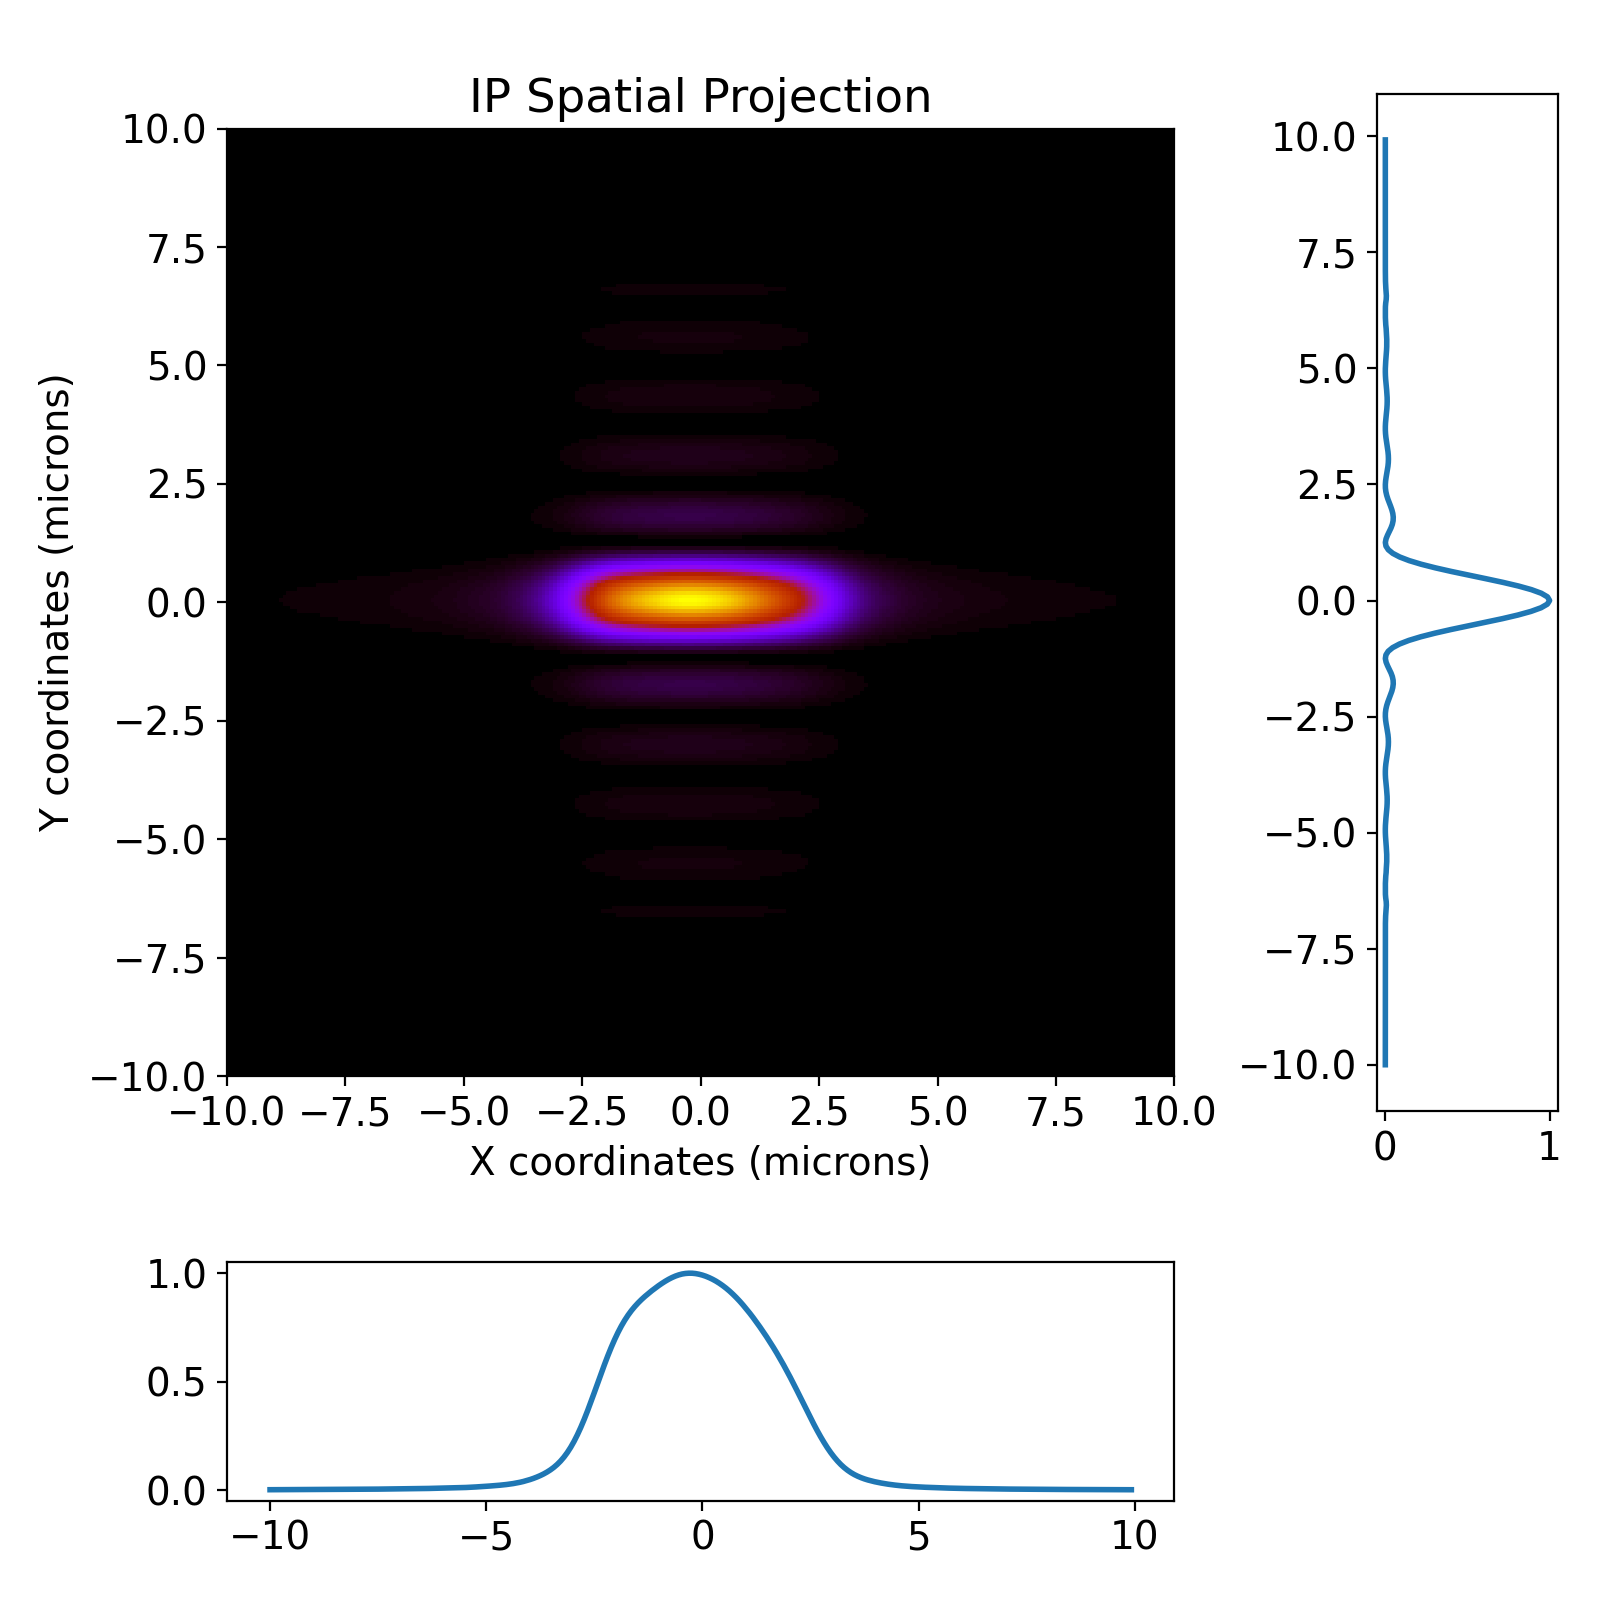

<IPython.core.display.Javascript object>


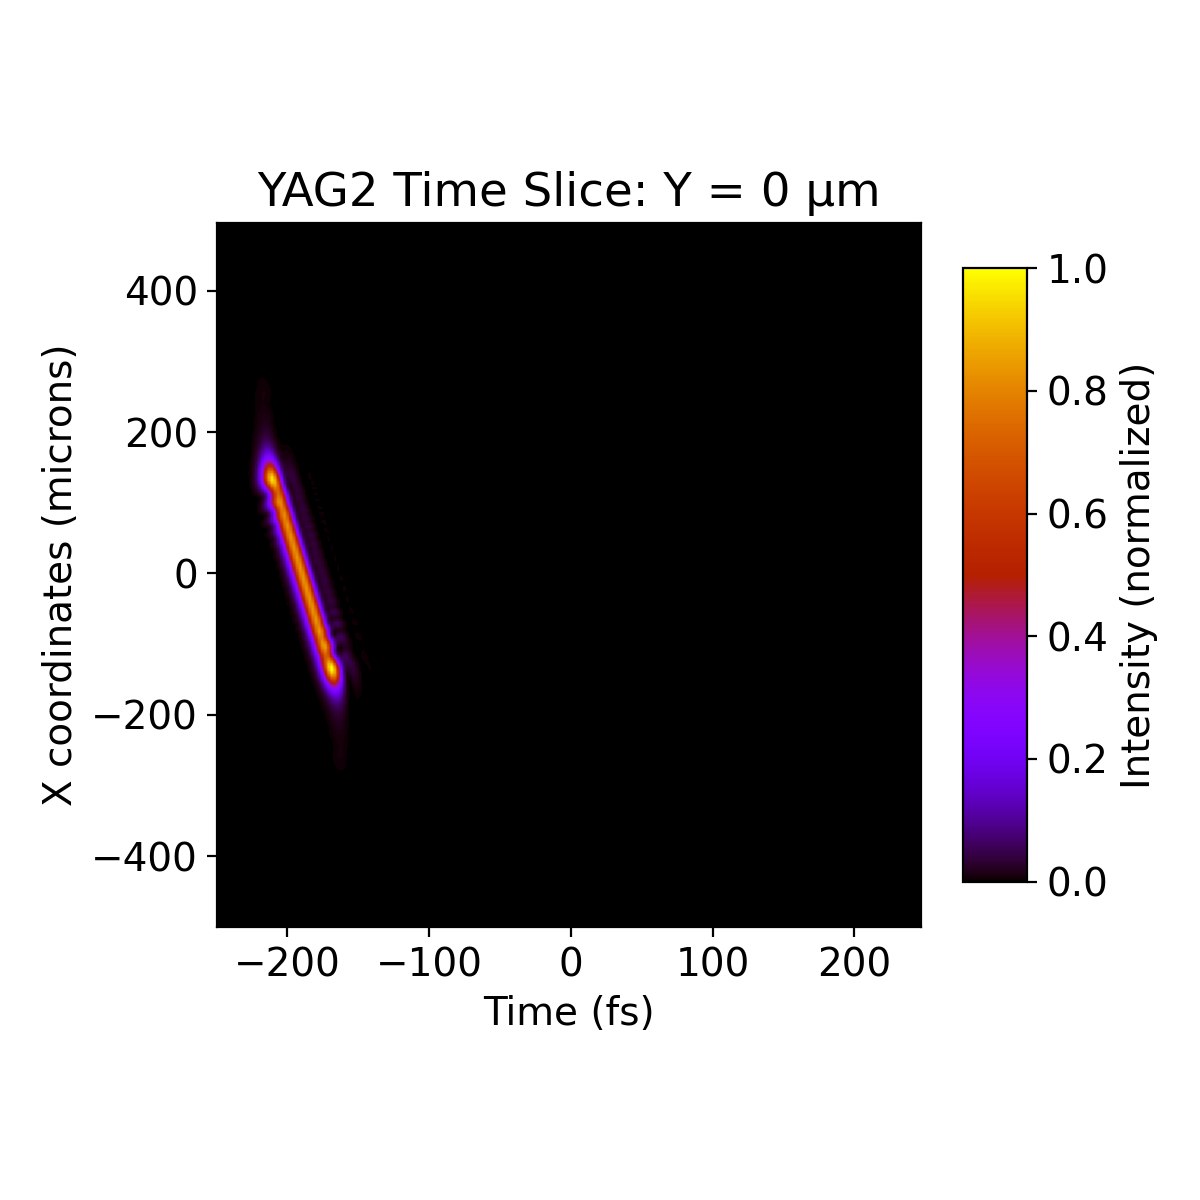

128


<IPython.core.display.Javascript object>


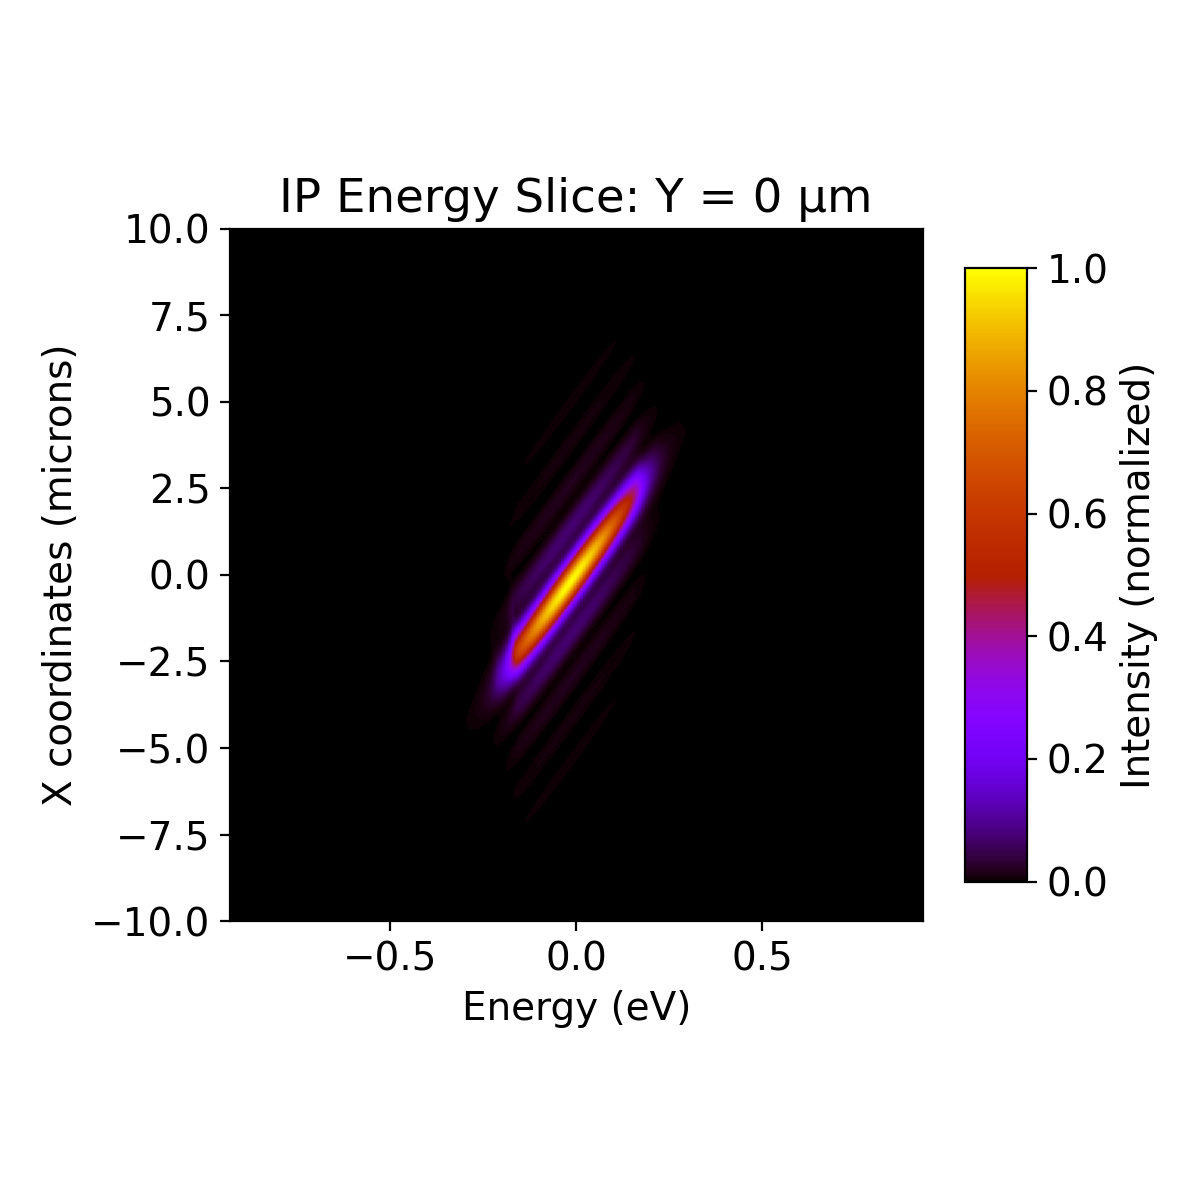

<IPython.core.display.Javascript object>


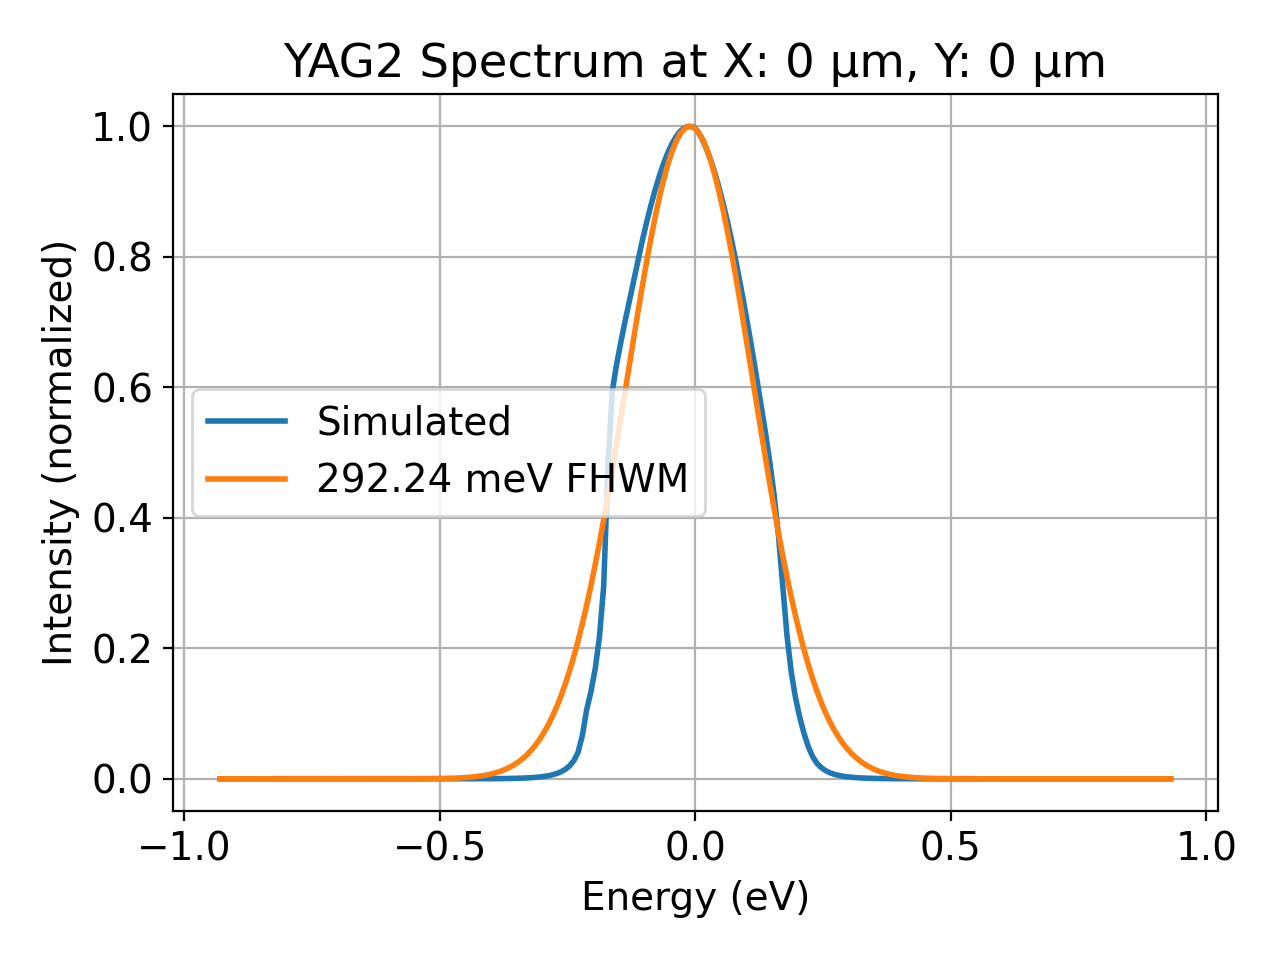

<IPython.core.display.Javascript object>


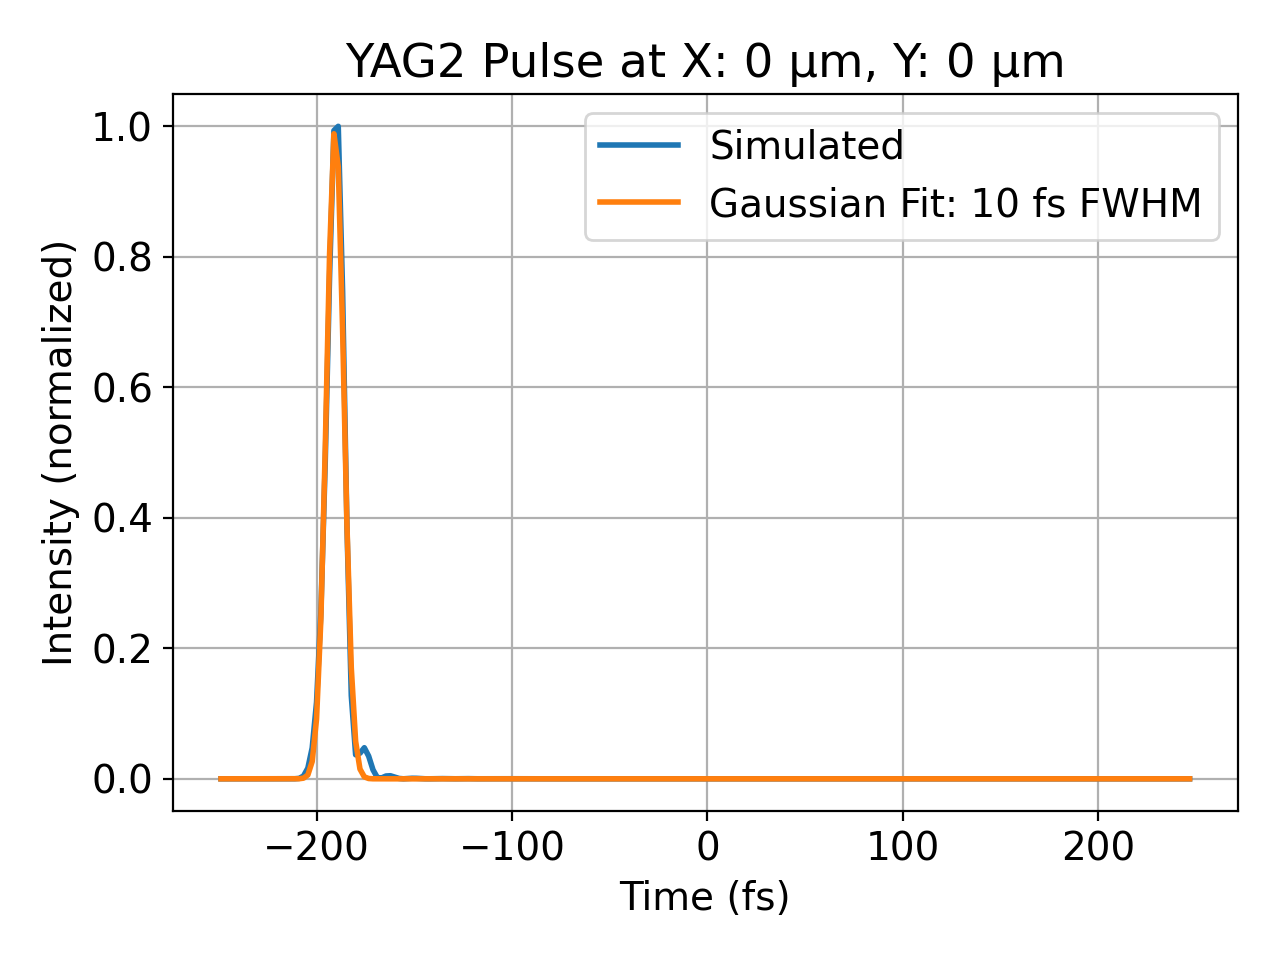

<IPython.core.display.Javascript object>


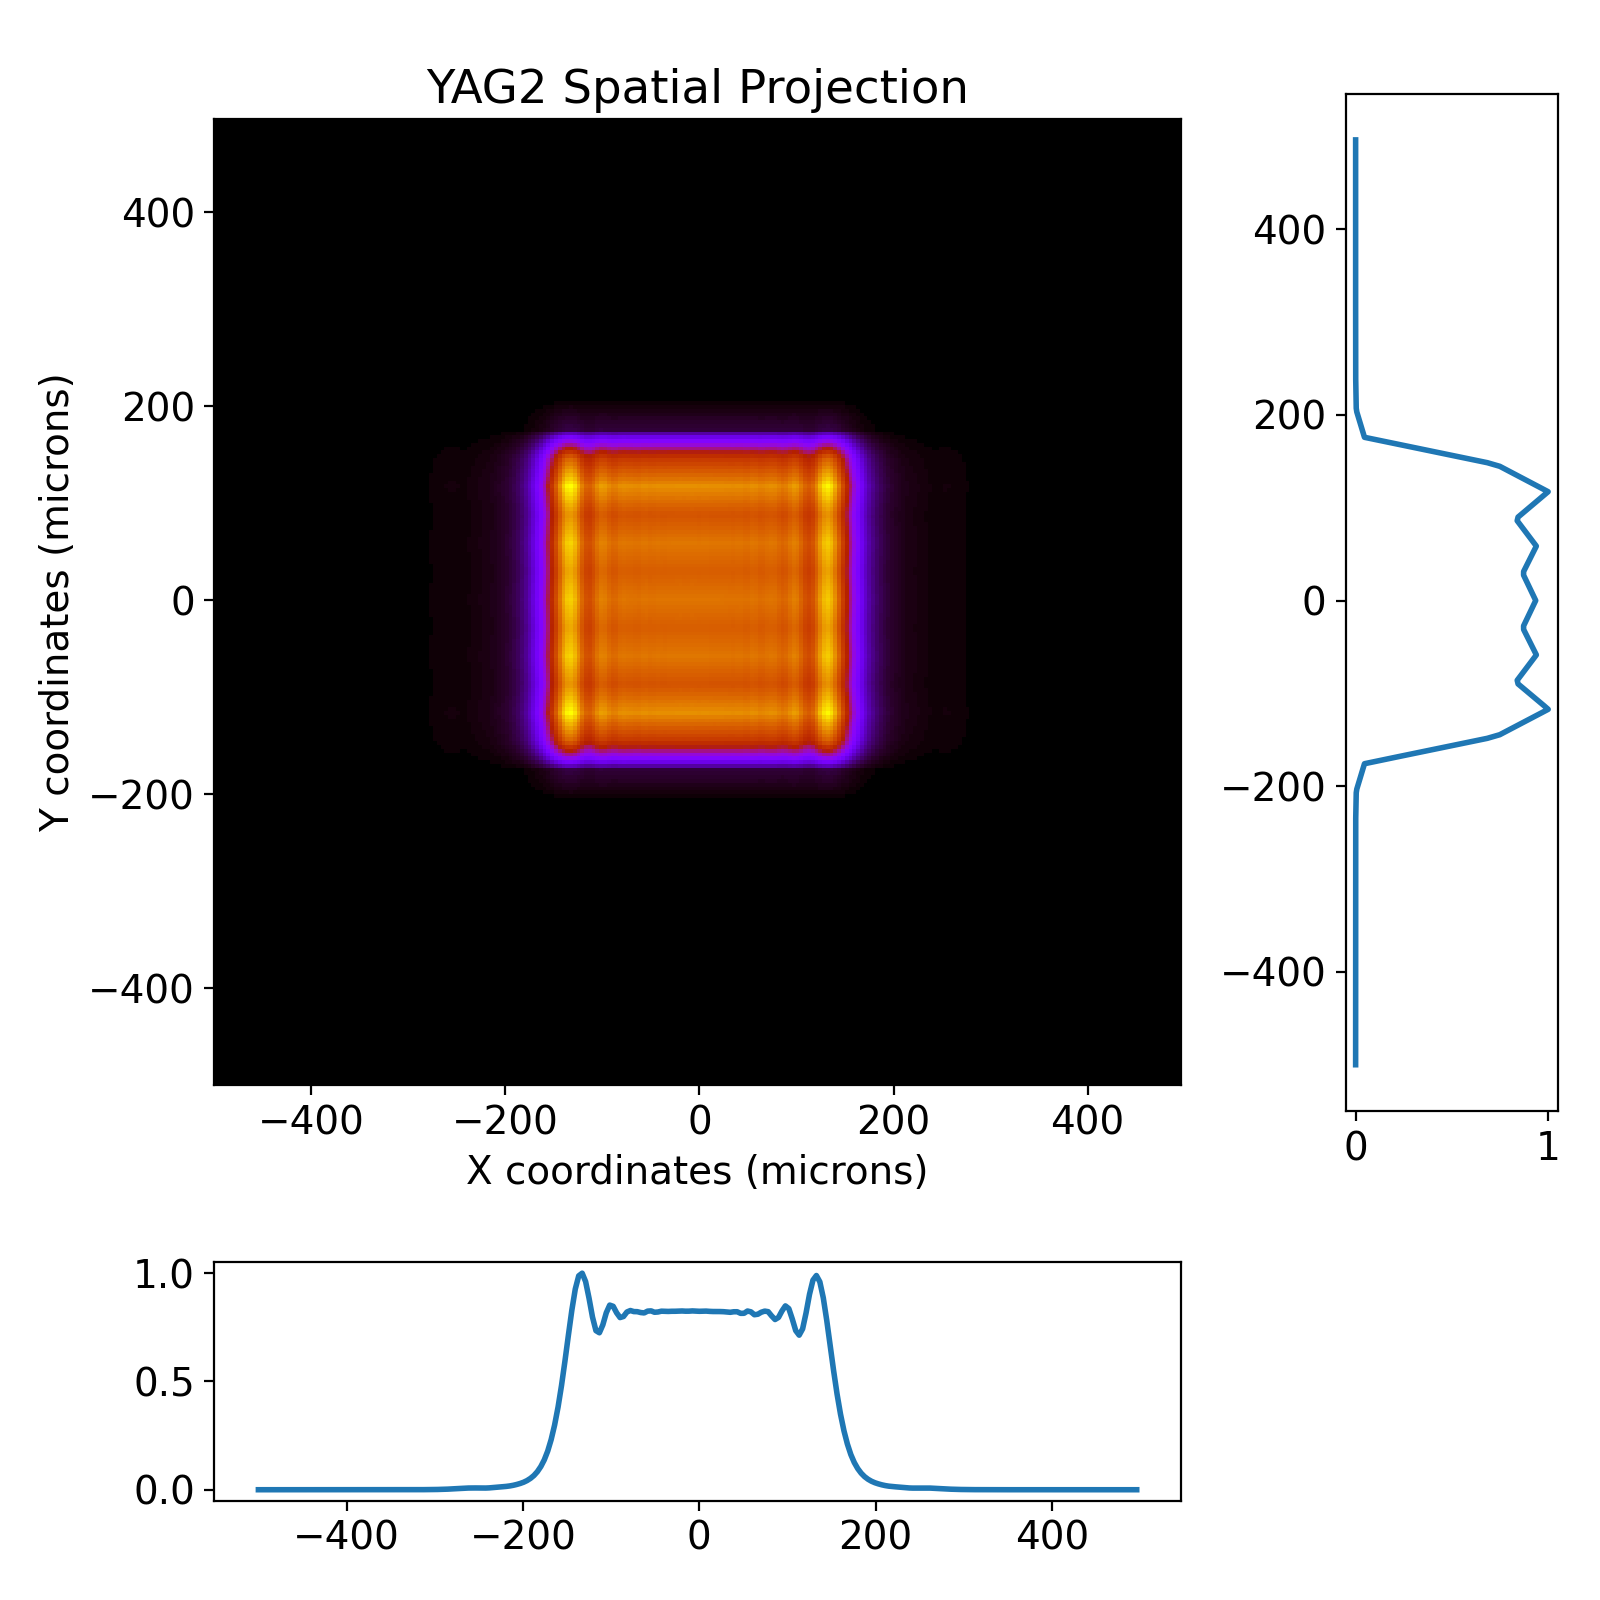

<IPython.core.display.Javascript object>


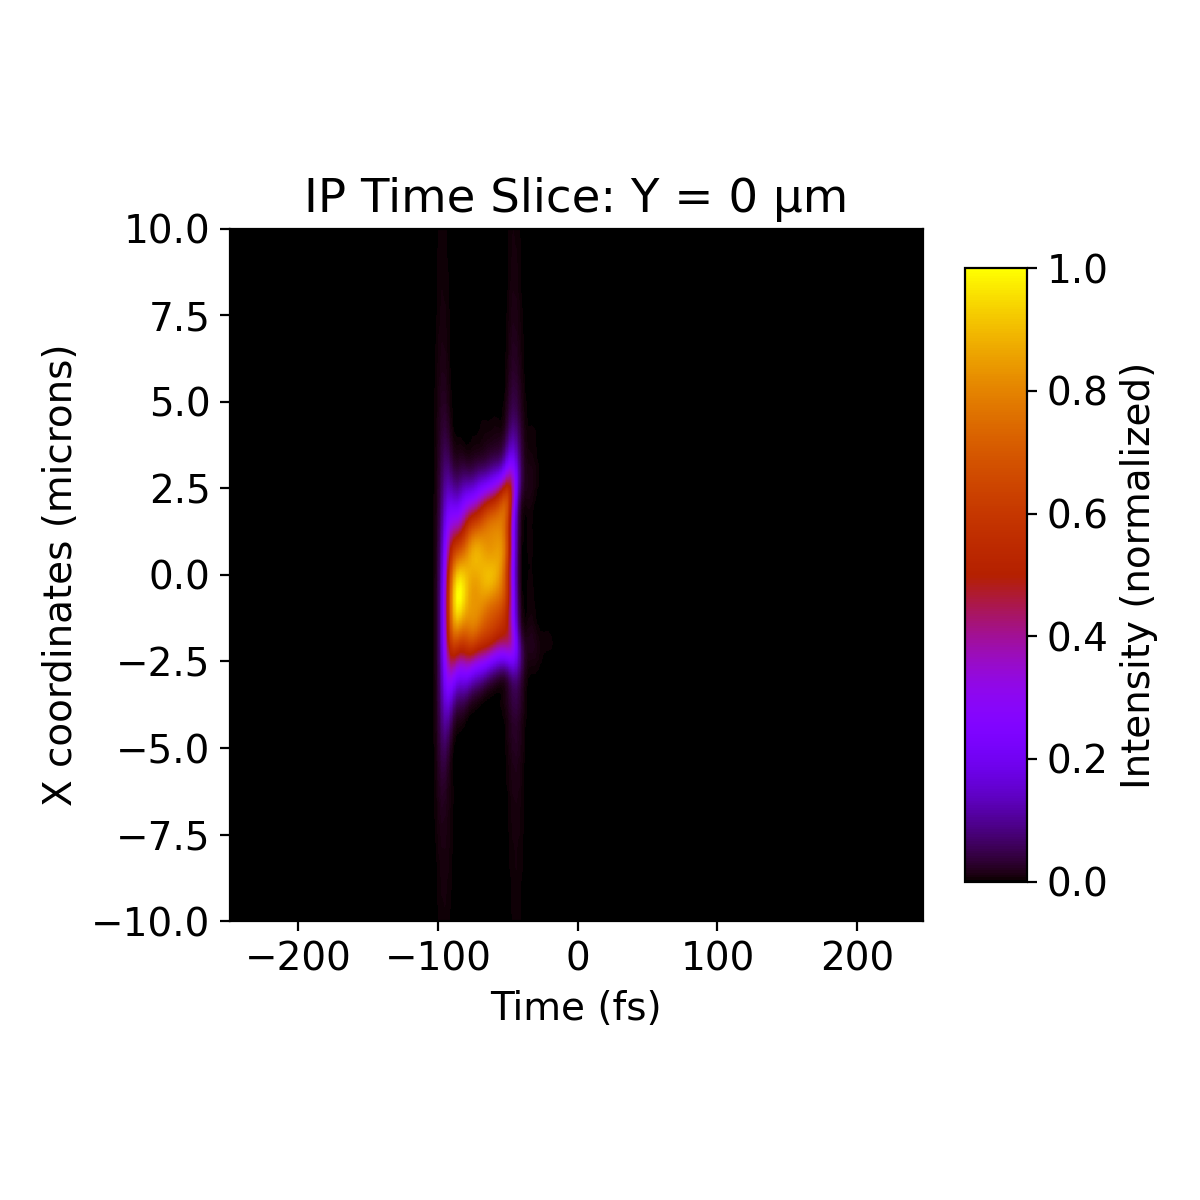

128


<IPython.core.display.Javascript object>


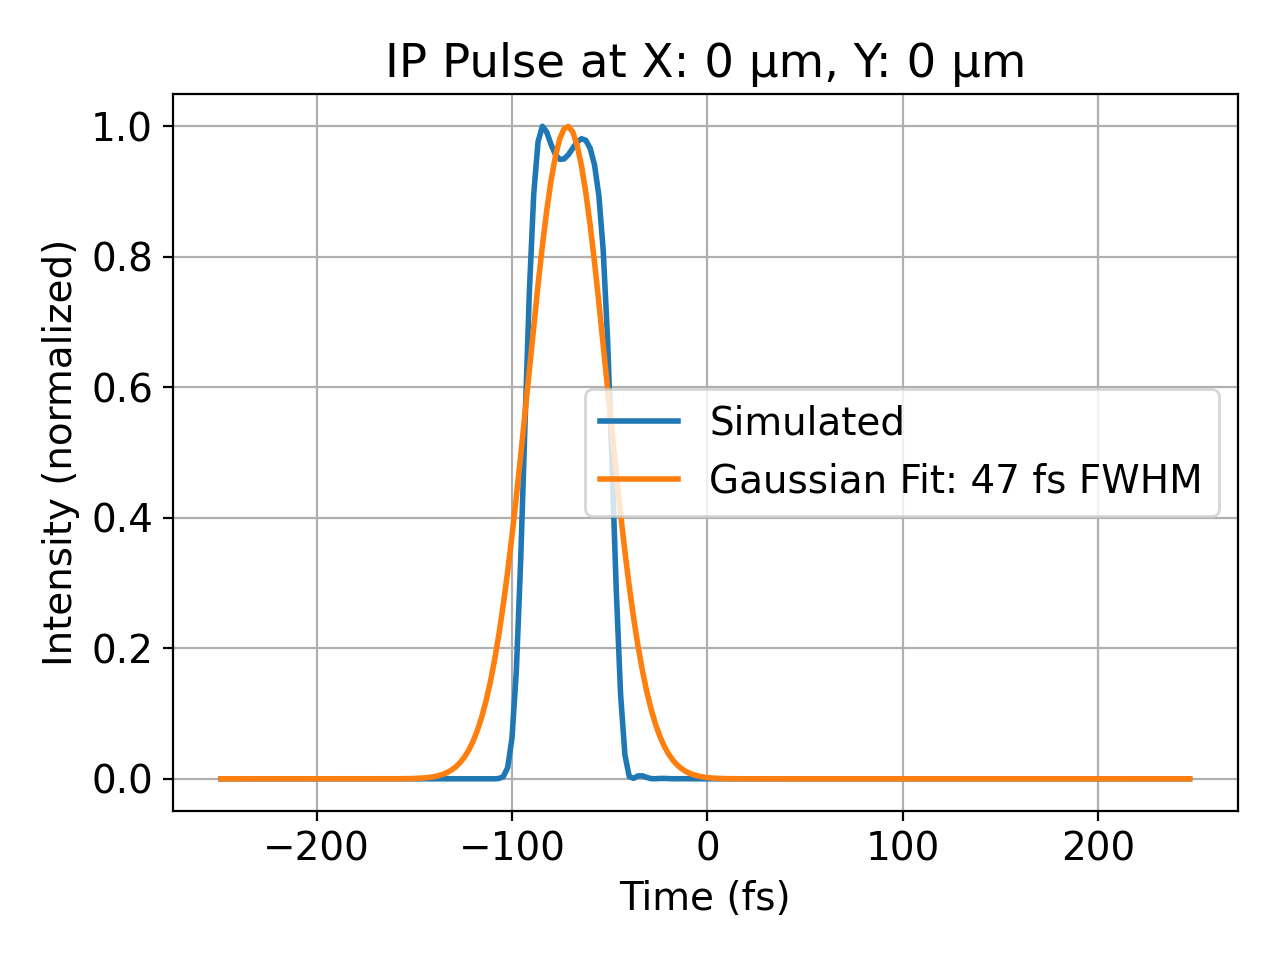

In [44]:
pulse_test.imshow_projection('IP')
# pulse_test.imshow_time_slice('YAG_mid')
# pulse_test.imshow_energy_slice('YAG_mid')
# pulse_test.imshow_time_slice('YAG1')
pulse_test.imshow_time_slice('YAG2')
# pulse_test.imshow_energy_slice('YAG1')
pulse_test.imshow_energy_slice('IP')
# pulse_test.plot_spectrum('YAG1')
pulse_test.plot_spectrum('YAG2',x_pos=0)
# pulse_test.plot_pulse('YAG1')
pulse_test.plot_pulse('YAG2')
# pulse_test.imshow_energy_slice('IP')
pulse_test.imshow_projection('YAG2')
pulse_test.imshow_time_slice('IP')
pulse_test.plot_pulse('IP')

<IPython.core.display.Javascript object>


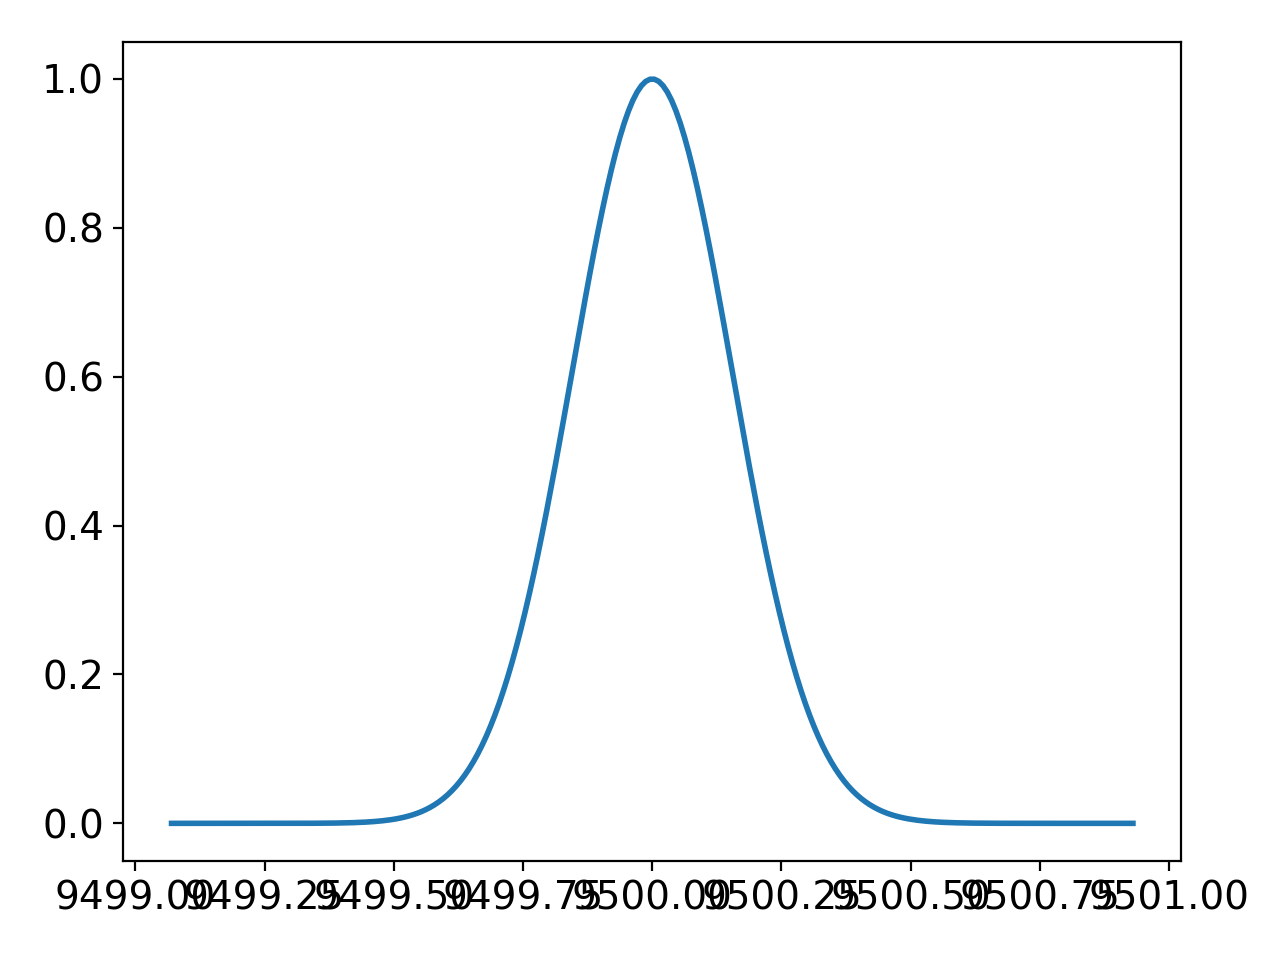

In [68]:
plt.figure()
plt.plot(pulse_test.energy,pulse_test.envelope**2)

In [8]:
(760-343)/180

2.316666666666667

In [33]:
(430-70)/350

1.0285714285714285

In [38]:
(430-90)/300

1.1333333333333333

In [16]:
(90+170)/480

0.5416666666666666

In [21]:
(680-512)/60

2.8